# Data Visualization with seaborn

In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
titanic = sns.load_dataset("titanic")

This notebook has been built following seaborn's documentation. Keep it close as you begin your Seaborn journey:

* [Official seaborn tutorial page](https://seaborn.pydata.org/tutorial.html)

* [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)

In this notebook we are going to look at seaborn's figure-level functions, as opposed to their axes-level functions. There are intrinsic differences between these two types of functions, but what you need to know is:
* Figure level: three basic functions to be used depending on what kind of data are you plotting e.g. `.catplot()` for categorical data
* Axes-level: many functions, one for each specific type of plot e.g `.barplot()`, `.histplot()`, etc.

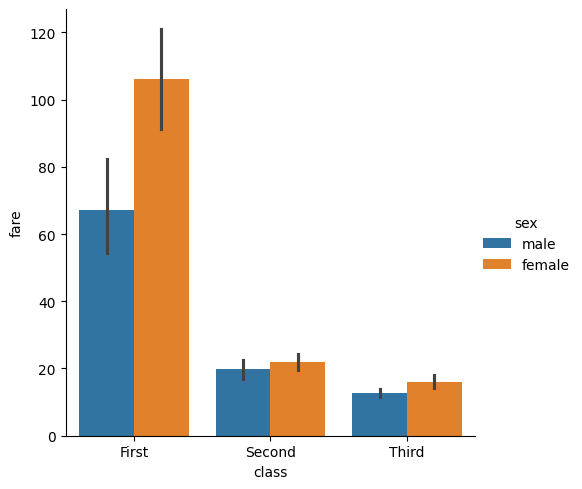

In [5]:
# Figure level plot
sns.catplot(kind="bar",data=titanic, x="class", y="fare", hue="sex");

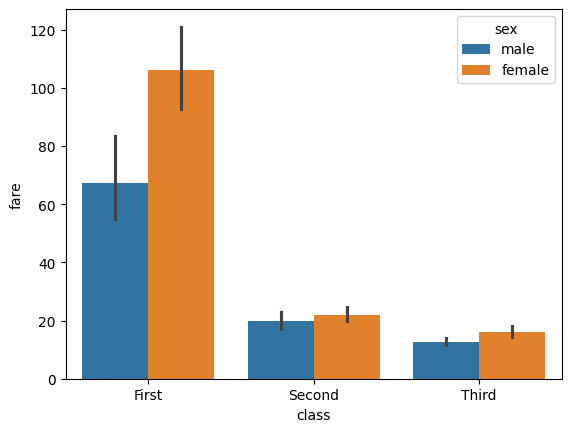

In [6]:
# Axes level plot
sns.barplot(data=titanic, x="class", y="fare", hue="sex");

Seaborn recommends using figure-level plots for most applications as they produce "slightly cleaner plots". Axes-level plots should only be used when you need to produce "complex, standalone figures that compose multiple different plot kinds".

There are 3 different types of figure-level plots in seaborn
* `.catplot()` - for categorical plots (discrete data)
* `.displot()` - for distributions (continuous data)
* `.relplot()` - for relational plots (do the features have a relationship?)

As seaborn is a well maintained and well known library, most of the parameters for these 3 types of figure-level plots are the same, which makes our lives very easy. It means that you only need to learn one set of skills and then you can apply it to many different situations. We will first look at `.catplot()`, showing you most of the universal parameters. Then we'll look at `.displot()` and `.relplot` to show you how to apply these parameters, and highlight a couple of unique ones too.

In this tutorial we'll use the titanic dataset, which is quite famous in the data science world. It can be easily loaded from seaborn itself.

In [7]:
# titanic = sns.load_dataset("titanic")

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.sort_values(by='fare', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


## 1.&nbsp; Categorical data: `catplot`

Use this function whenever you want to plot a categorical feature. You might want to plot it together with a numerical feature: still, `catplot` is your function as long as one of the features is categorical.

[.catplot() docs](https://seaborn.pydata.org/generated/seaborn.catplot.html)


[Seaborn tutorial for plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

### 1.1.&nbsp; Selecting features

#### 1.1.1.&nbsp; `x` and `y`
One of the nicest things about seaborn's figure-level functions is that we can feed them a whole DataFrame, and then just select the columns we want to plot in their parameters. Seaborn will then do the rest, sometimes even aggregating the data for us.

Below we can see how much people paid and which class they were in. The columns passed to the `x` and `y` parameters get allocated to the horizontal and vertical axis respectively:

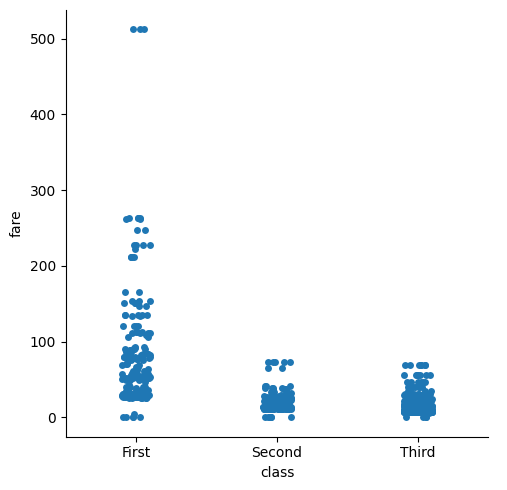

In [10]:
sns.catplot(data=titanic,
            x="class",
            y="fare"
            );

Looks like a few people paid a lot more than everyone else in first class!

#### 1.1.2.&nbsp; `hue`
We can also divide our data by colour using the `hue` parameter.

Now we can see the same data as above, but divided by `sex`.

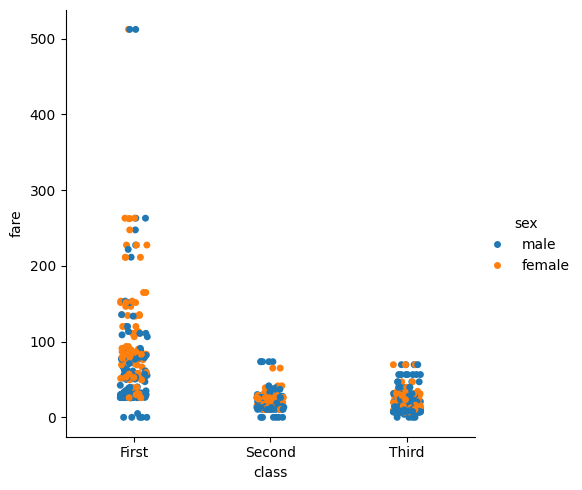

In [11]:
sns.catplot(data=titanic,
            x="class",
            y="fare",
            hue="sex"
            );

> **Tip:** It only makes sense to use the `hue` parameter with a categorical feature that has a small number of categories, like `sex`. Try passing `fare` or `age` to the parameter and you'll see why...

#### 1.1.3.&nbsp; `col`
It is also possible to create multiple plots based on a category, which will share a y-axis - we simply place this category in the `col` parameter.

Below we can see how much people paid, the class they travelled in, their sex, and in which port they boarded the boat.

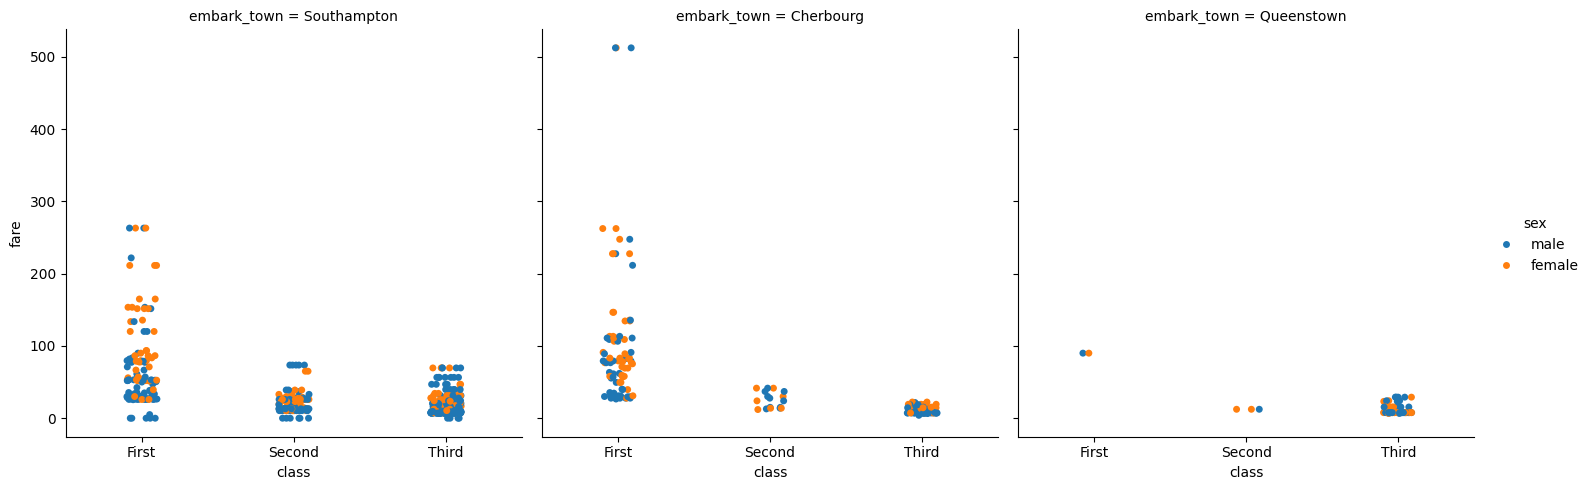

In [12]:
sns.catplot(data=titanic,
            x="class",
            y="fare",
            hue="sex",
            col="embark_town");

Interesting to see that almost everyone who boarded in [Queenstown](https://en.wikipedia.org/wiki/Cobh) had a third class ticket. Feel free to deliberate about the reasons why later.

> **Tip:** Complex plots that combine many variables together are a good exploratory tool. They allow Data Analysts to uncover hidden insights. However, these plots are generally terrible for presentations where the audience does not have a lot of time to analyse the plot. In presentations, always use only simple plots conveying a clear message. If a complex plot is needed, either send it beforehand to the audience or take the time to explain it during the presentation.

##### `col_wrap`
Sometimes, if the feature you selected for `col` has many categories it may struggle to be legible on the screen, such as the example below.

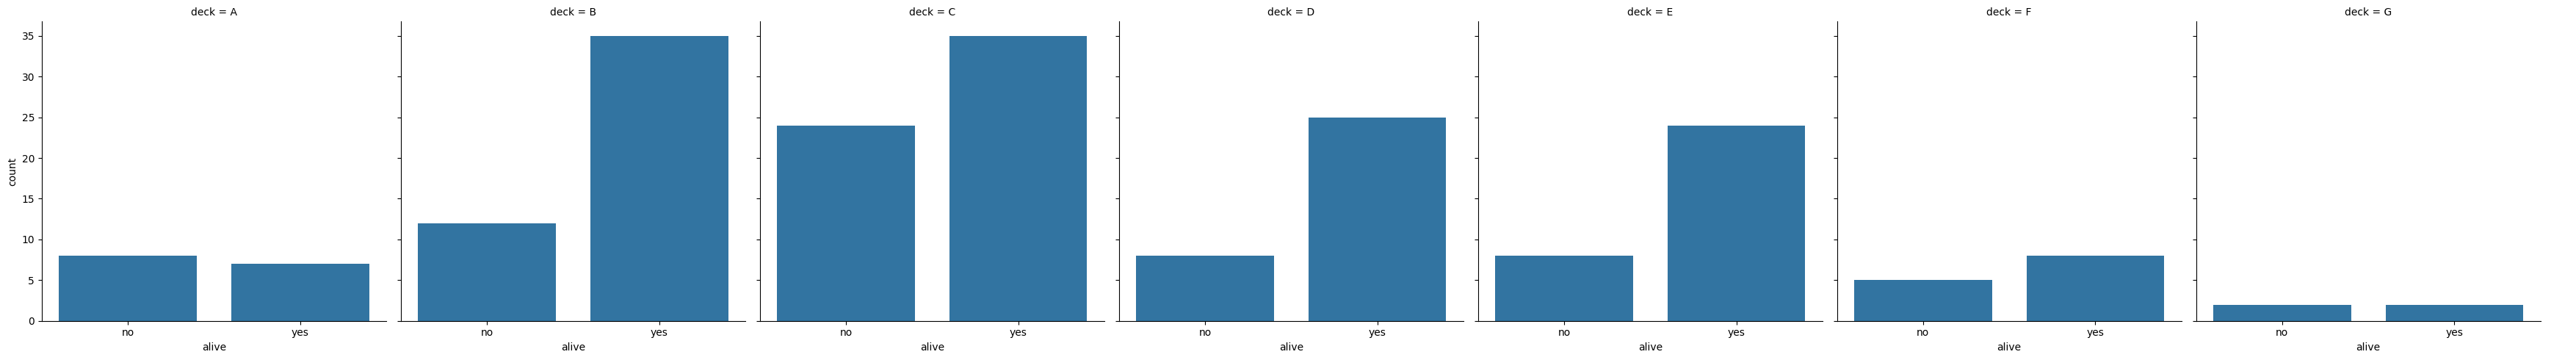

In [13]:
sns.catplot(data=titanic,
            x="alive",
            col="deck",
            kind="count");

It is possible to spread out the columns over multiple lines using the parameter `col_wrap`

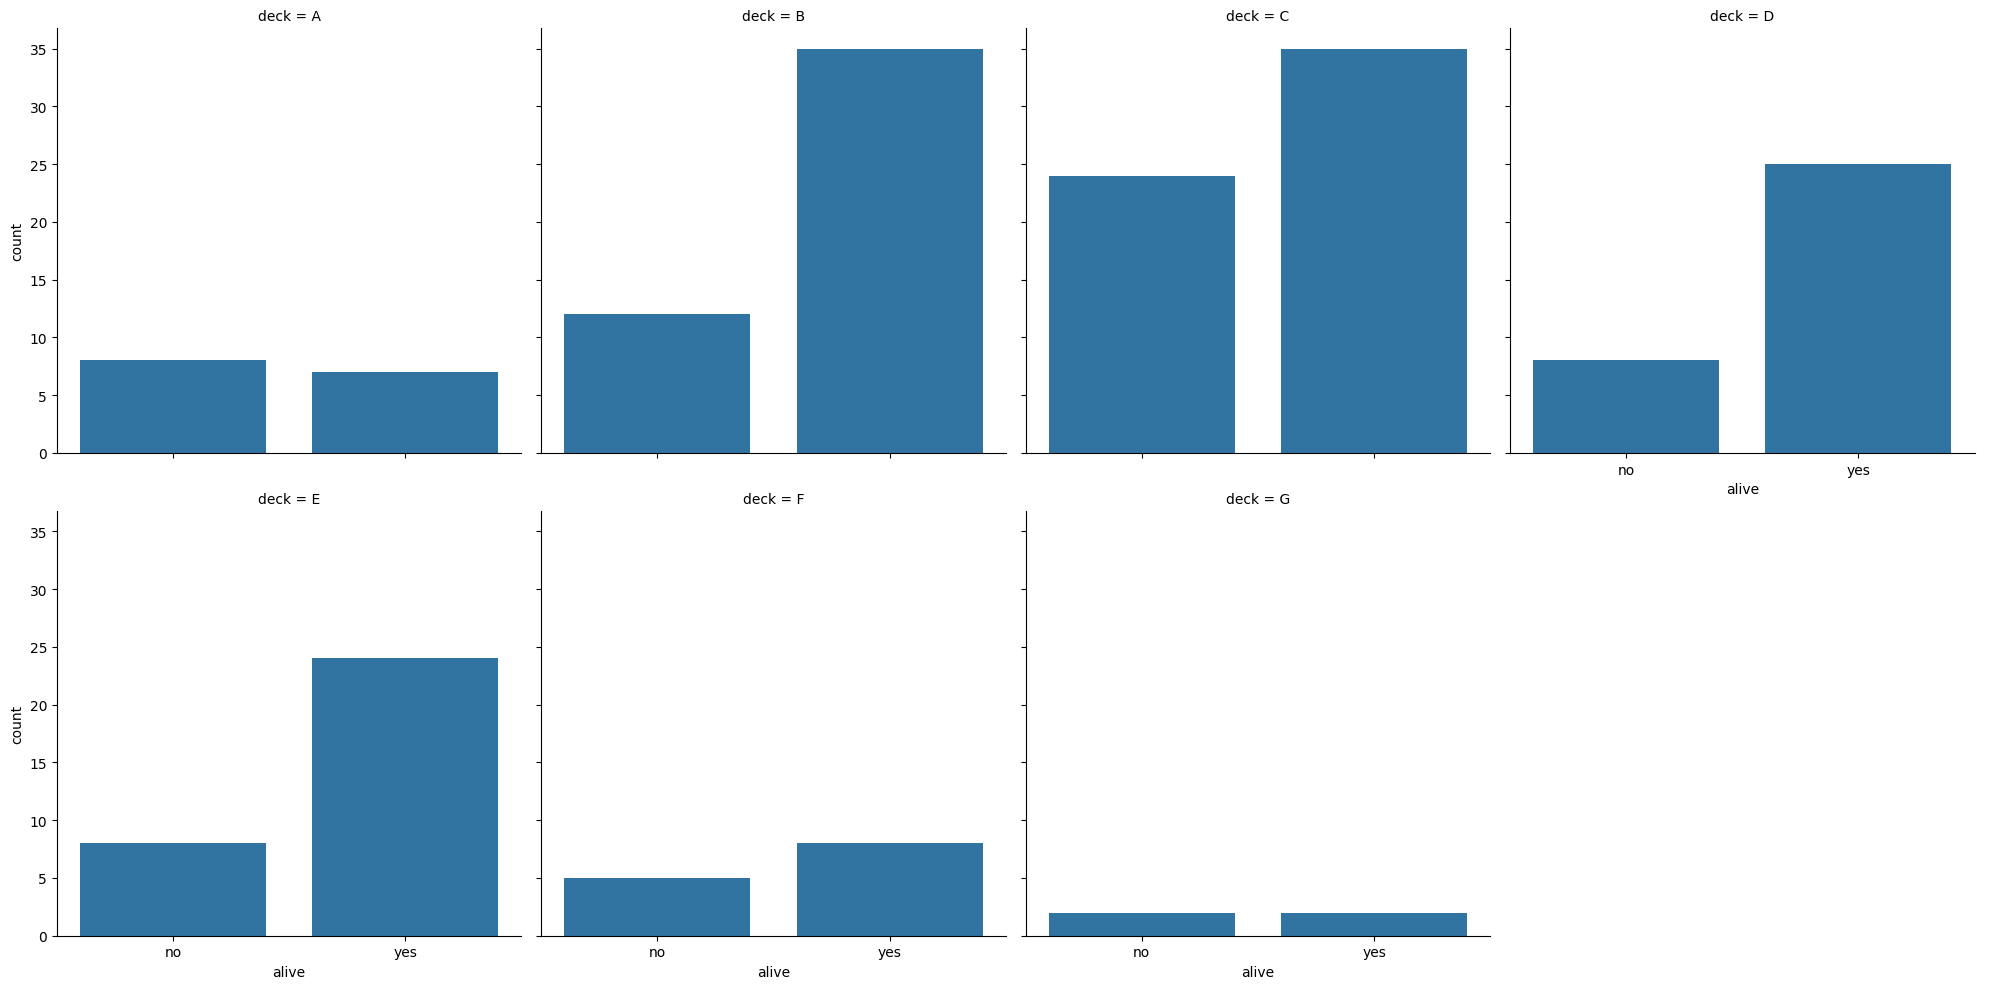

In [14]:
sns.catplot(data=titanic,
            x="alive",
            col="deck",
            col_wrap=4,
            kind="count");

#### 1.1.3.&nbsp; `row`
You can also split the categories vertically using the `row` parameter.

Here, we've used a `.displot()`, we'll go through those later in the notebook

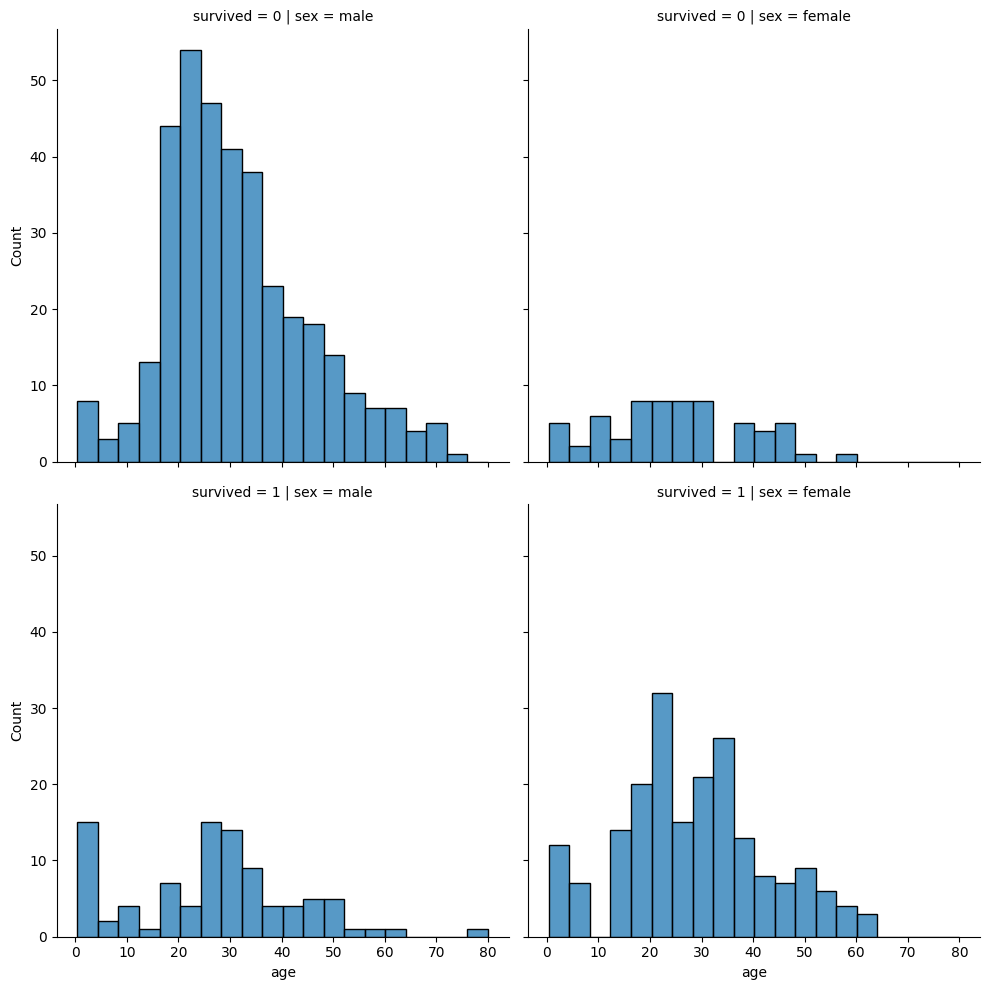

In [15]:
sns.displot(data=titanic,
            x="age",
            col="sex",
            row="survived");

### 1.2.&nbsp; Selecting the type of plot
You may have noticed above that we also used the parameter `kind`, we can use this to change the type of categorical plot.

Categorical scatterplots:

* [.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) - `kind="strip"` the default

* [.swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) - `kind="swarm"`

Categorical distribution plots:

* [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) - `kind="box"`

* [.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) - `kind="violin"`

* [.boxenplot()](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) - `kind="boxen"`

Categorical estimate plots:

* [.pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) - `kind="point"`

* [.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) - `kind="bar"`

* [.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) - `kind="count"`

Each of these `kind`s have individual parameters that you can find on their documentation page.

#### 1.2.1.&nbsp; `kind = "bar"`
* The height of the bar is the arithmetic mean of the values.
* Black lines are the [confidence interval](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/introduction-confidence-intervals/v/confidence-intervals-and-margin-of-error).
  * Can be controlled with the parameter `ci`:
    * `float`: size of confidence interval - default `95`
    * `"sd"`: draw standard deviation with black lines
    * `None`: don't draw black lines

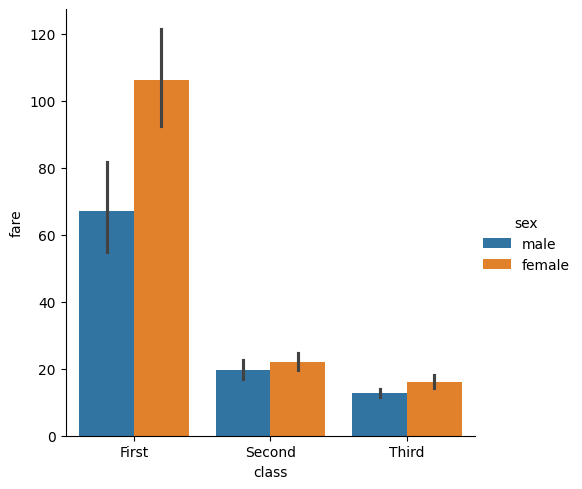

In [16]:
sns.catplot(kind="bar",
            data=titanic,
            x="class",
            y="fare",
            hue="sex");

Why did women pay more on average?

#### 1.2.2.&nbsp; `kind = count`
A `count` plot shows the count of each category.

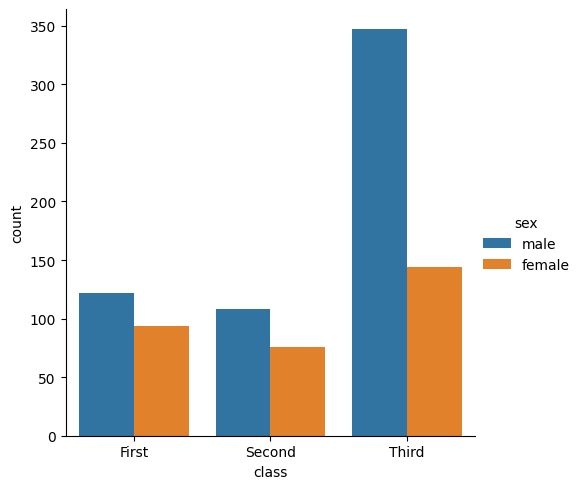

In [17]:
sns.catplot(kind="count",
            data=titanic,
            x="class",
            hue="sex");

That's a big gender imbalance in third class!

### 1.3.&nbsp; Changing the size of a plot

#### 1.3.1.&nbsp; `height`
The official documentation says the `height` is the "Height (in inches) of each facet." Inches don't always translate on the screen, due to zoom, pixel density and other things, so take the interpretation of the number with a pinch of salt.

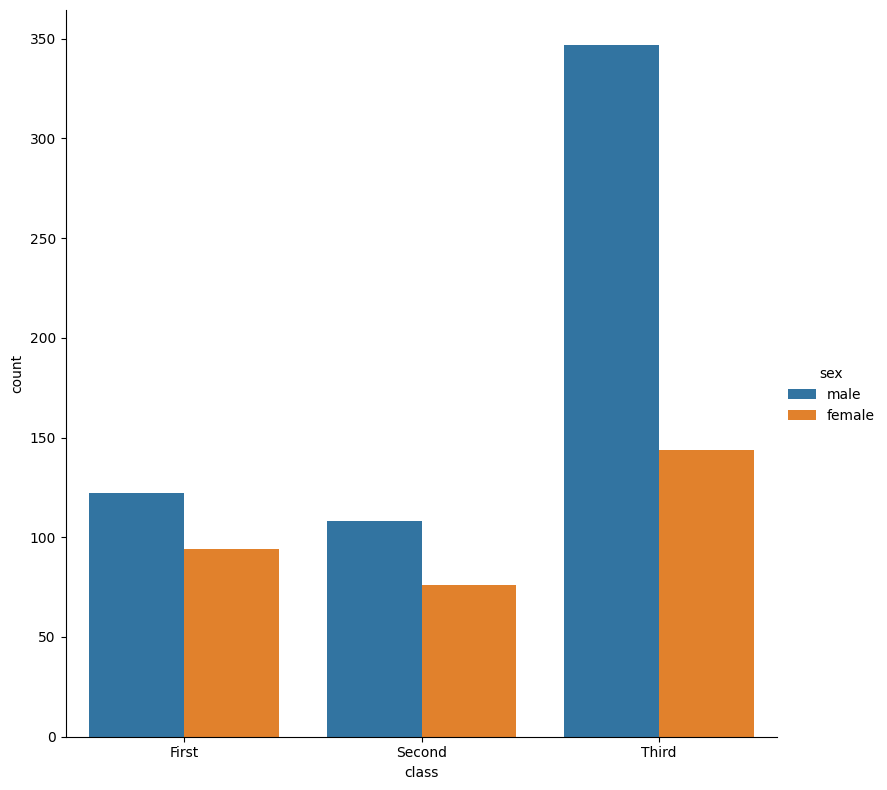

In [18]:
sns.catplot(kind="count",
            data=titanic,
            x="class",
            hue="sex",
            height=8);

#### 1.3.2.&nbsp; aspect
Officially aspect is the "ratio of each facet, so that aspect * height gives the width of each facet in inches." It's probably more easily undorstood as affecting the width of the plot.

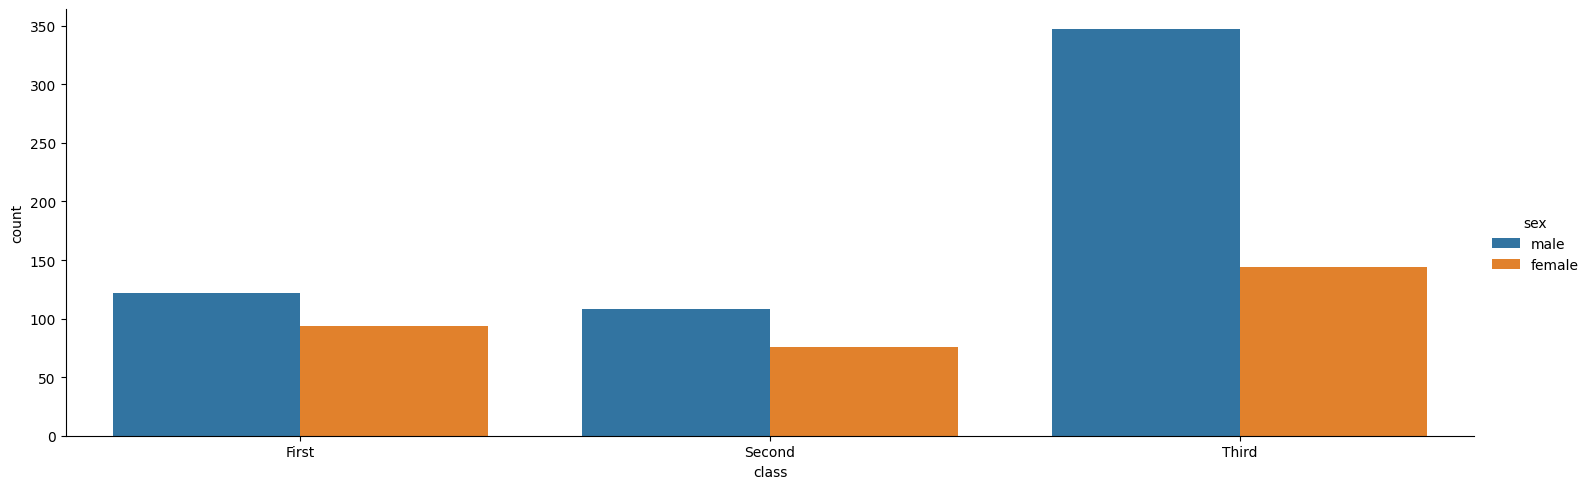

In [19]:
sns.catplot(kind="count",
            data=titanic,
            x="class",
            hue="sex",
            aspect=3);

Both `height` and `aspect` can be used together to control the overall size of a plot.

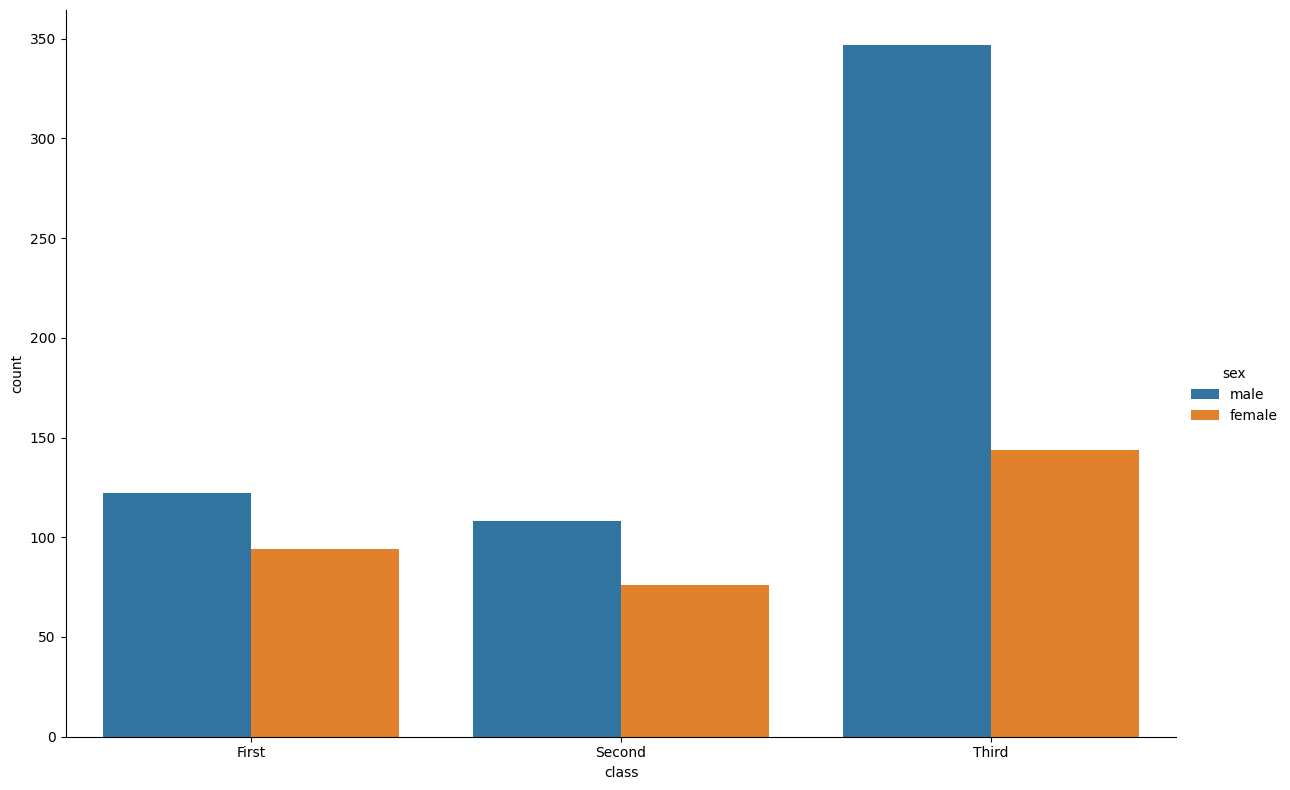

In [20]:
sns.catplot(kind="count",
            data=titanic,
            x="class",
            hue="sex",
            height=8,
            aspect=1.5);

### 1.4.&nbsp; Changing the colour
[Colour documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

#### 1.4.1.&nbsp; `color`
With the `color` parameter we can choose a specific colour for the plot. Obviously, you should not use this parameter if you are already using `hue` to define the colour of the plot based on a variable.

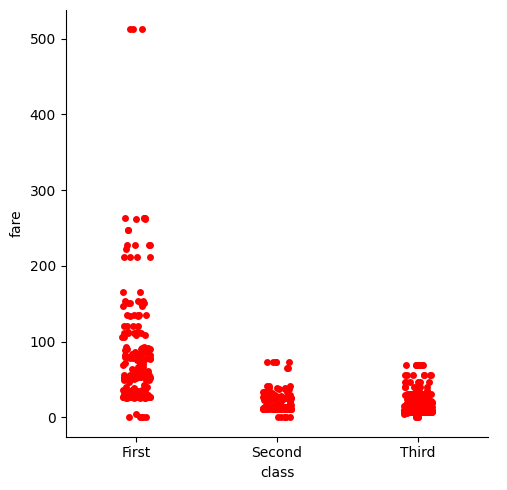

In [21]:
sns.catplot(data=titanic,
            x="class",
            y="fare",
            color="red");

#### 1.4.2. `palette`
With `palette` we can choose a range of colours for the plot. In this case, you can use a palette together with `hue` to define which colors will be taken by each category.

Seaborn is know for it's great colours, please explore the documentation and experiment.

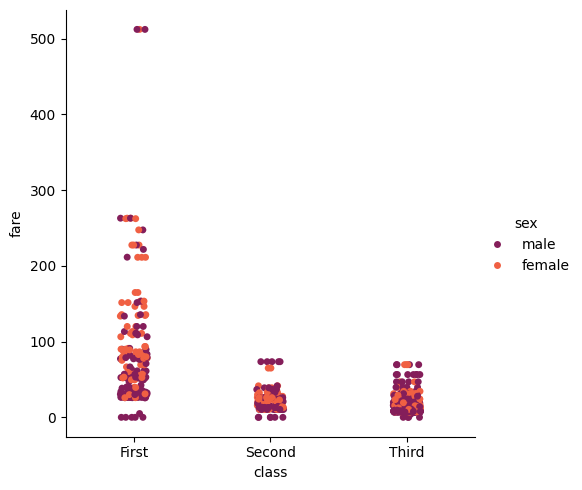

In [22]:
sns.catplot(data=titanic,
            x="class",
            y="fare",
            hue="sex",
            palette="rocket");

> **Tip:** Making a plot _exactly_ how you want it to be can be very challenging, and you are just at the start of your journey. For now, embrace default options, prioritize simplicity and take it one step at a time. In some cases, expressing the message that the plot conveys in a simple sentence is as useful or more as the plot itself!

# Challenge 1:
Make a plot that shows the number of passengers who survived and the number who died. Divide this data by sex and class. Feel free to play around with other parameters such as height and palette too.

In [23]:
# your code here
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

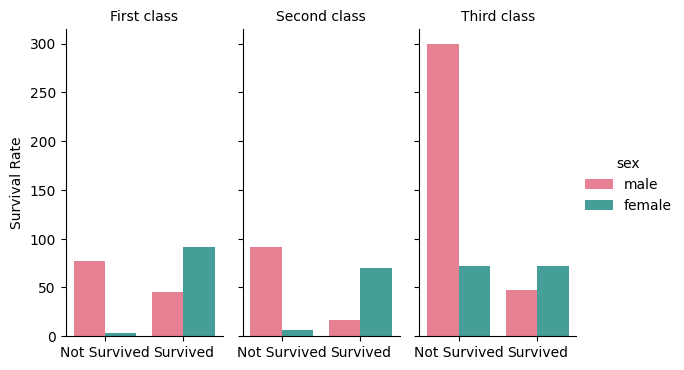

In [24]:
g = sns.catplot(data=titanic,
                    kind="count",
                    x="survived",
                    hue="sex",
                    col="class",
                    aspect=0.5,
                    height=4,
                    palette="husl");
                    #palette="rocket");
g.set_xticklabels(["Not Survived", "Survived"])
g.set_axis_labels("", "Survival Rate")
g.set_titles("{col_name} {col_var}");

## 2.&nbsp; Distributions: `.displot()`
[.displot() docs](https://seaborn.pydata.org/generated/seaborn.displot.html)


[Seaborn tutorial for plotting distributions](https://seaborn.pydata.org/tutorial/distributions.html)

`kind`s of `.displot()`:
* [.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) - `kind="hist"` the default
* [.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) - `kind="kde"`
* [.ecdfplot()](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) - `kind="ecdf"`

### 2.1.&nbsp; Universal parameters
Just like above, we can use `x`, `hue`, `col`, `color`, etc... The main difference you'll find here, is that in some `.catplot()`s you used 2 features `x` and `y`, distributions look at only one feature, so we won't be using the `y` parameter much.

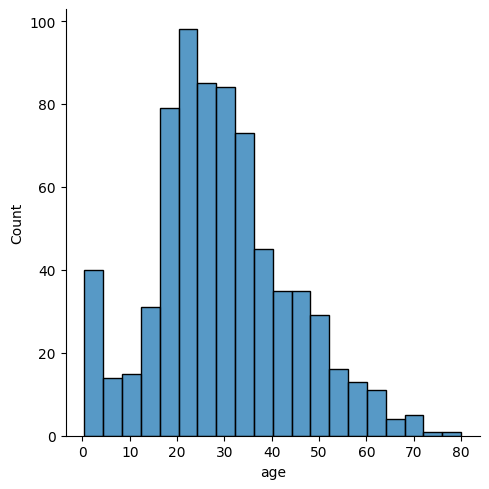

In [25]:
sns.displot(data=titanic,
            x="age");

We may not be using `y` for histograms, but we can still utilise `hue` and `col` to gain insights.

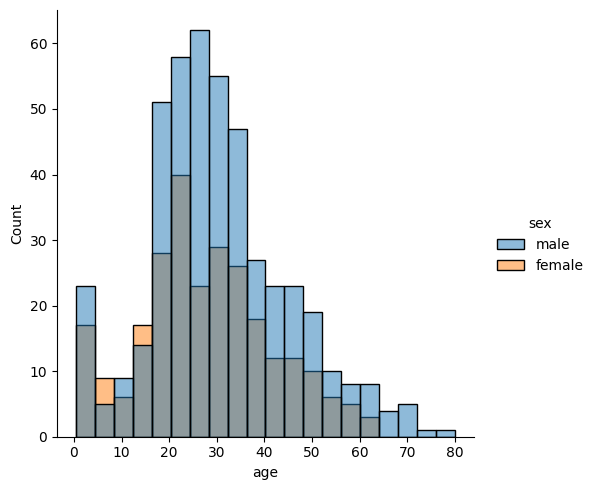

In [26]:
sns.displot(data=titanic,
            x="age",
            hue="sex");

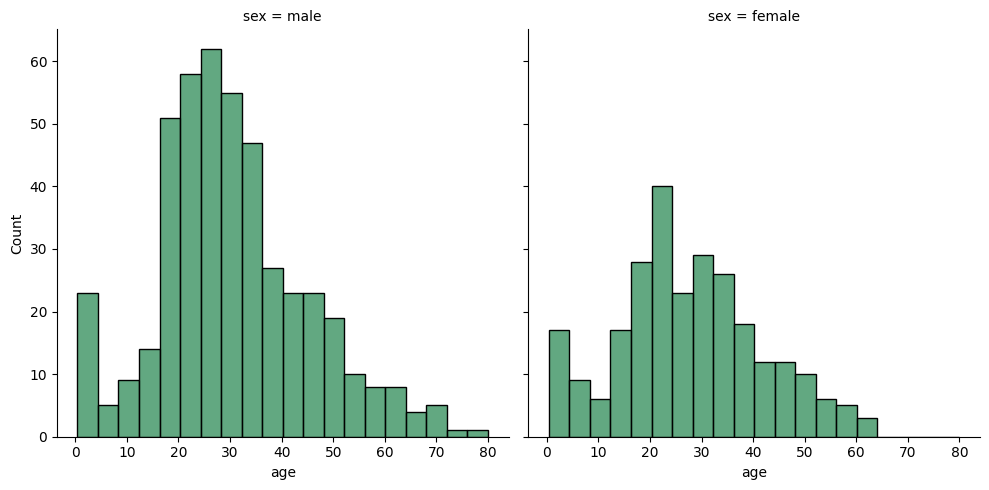

In [27]:
sns.displot(data=titanic,
            x="age",
            col="sex",
            color="seagreen");

### 2.2.&nbsp; Parameters unique to histograms
We use histograms a lot to get an idea of how our data is distributed, so let's look quickly how we can improve on the basic plot.

#### 2.2.1.&nbsp; Changing the aggregate

##### `stat`
`stat` is an aggregate to compute each bin:
* `count`: show the number of observations in each bin
* `frequency`: show the number of observations divided by the bin width
* `probability`: or proportion: normalize such that bar heights sum to 1
* `percent`: normalize such that bar heights sum to 100
* `density`: normalize such that the total area of the histogram equals 1

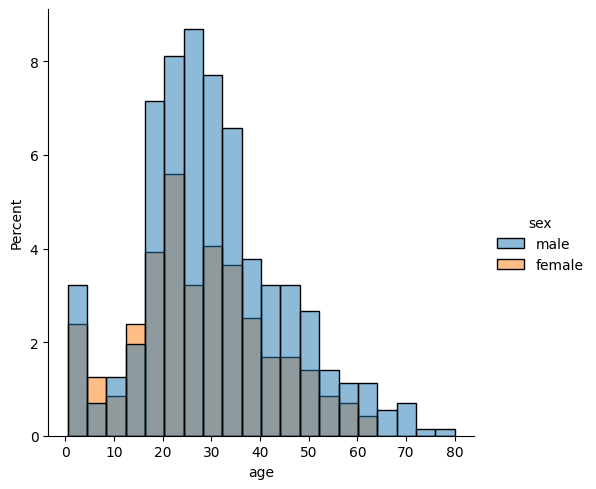

In [28]:
sns.displot(data=titanic,
            x="age",
            hue="sex",
            stat="percent");

#### 2.2.2.&nbsp; Changing the granularity

##### `bins` or `binwidth`

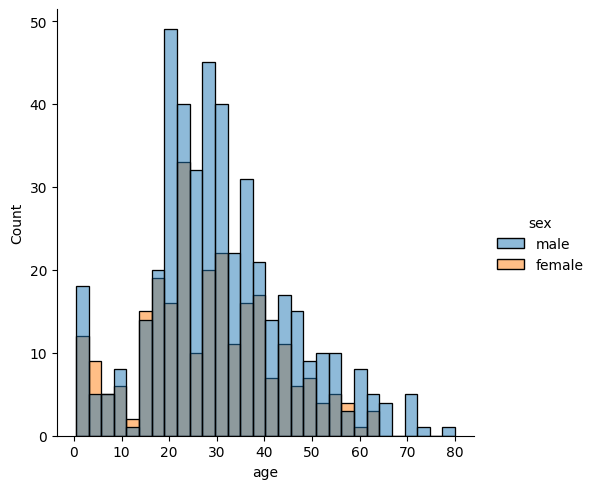

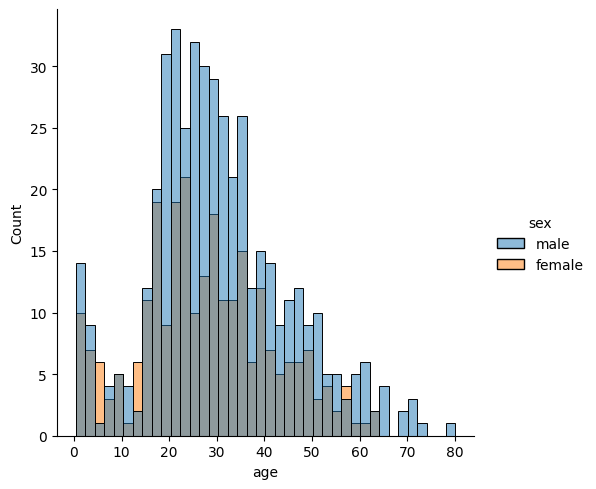

In [29]:
sns.displot(data=titanic,
            x="age",
            hue="sex",
            bins=30),
sns.displot(data=titanic,
            x="age",
            hue="sex",
            binwidth=2);

The higher the number of `bins`, or smaller the `binwidth` the greater the granularity.

#### 2.2.3.&nbsp; Tracing the trend
We can also trace a smooth curve along the histogram using the `kde` parameter. If you're unsure what `kde` is, take a look in the next section `kde` is also a standalone plot from `.displot()`

##### The `kde` parameter:

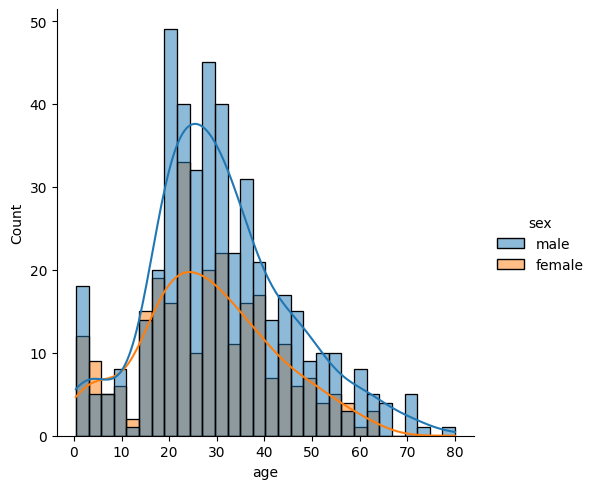

In [30]:
sns.displot(data=titanic,
            x="age",
            hue="sex",
            bins=30,
            kde=True);

### 2.3.&nbsp; `kde` plots
Seaborn explains a `kde` plot very well:

> "A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. [...] Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth."



Essentially, it's another way of viewing the same information as a histogram. They both have their (de)merits.


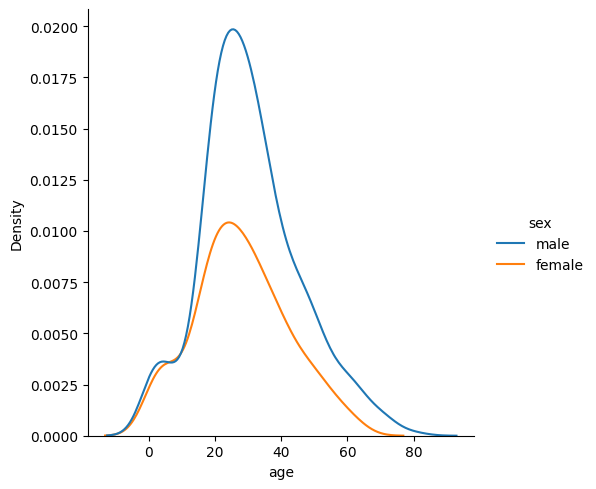

In [31]:
sns.displot(kind="kde",
            data=titanic,
            x="age",
            hue="sex");

## 3.&nbsp; Relational data: `.relplot()`
[.relplot() docs](https://seaborn.pydata.org/generated/seaborn.relplot.html)


[Seaborn tutorial for plotting statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

`kind`s of `.relplot()`
* [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) - `kind="scatter"` the default
* [.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) - `kind="line"`

### 3.1.&nbsp; Universal parameters
As relational plots are comparing the relationship between features, here, unlike a distribution plot, we will generally always have an `x` and a `y`.

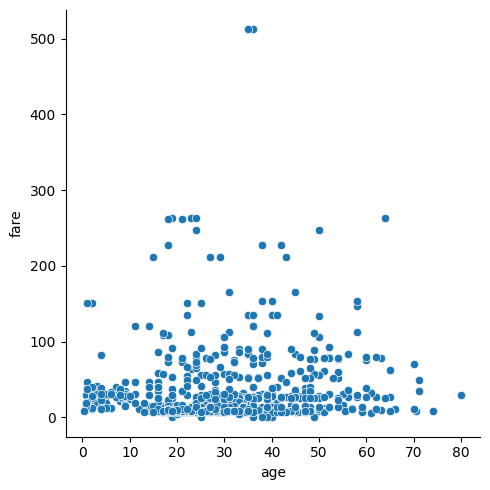

In [32]:
sns.relplot(data=titanic,
            x="age",
            y="fare");

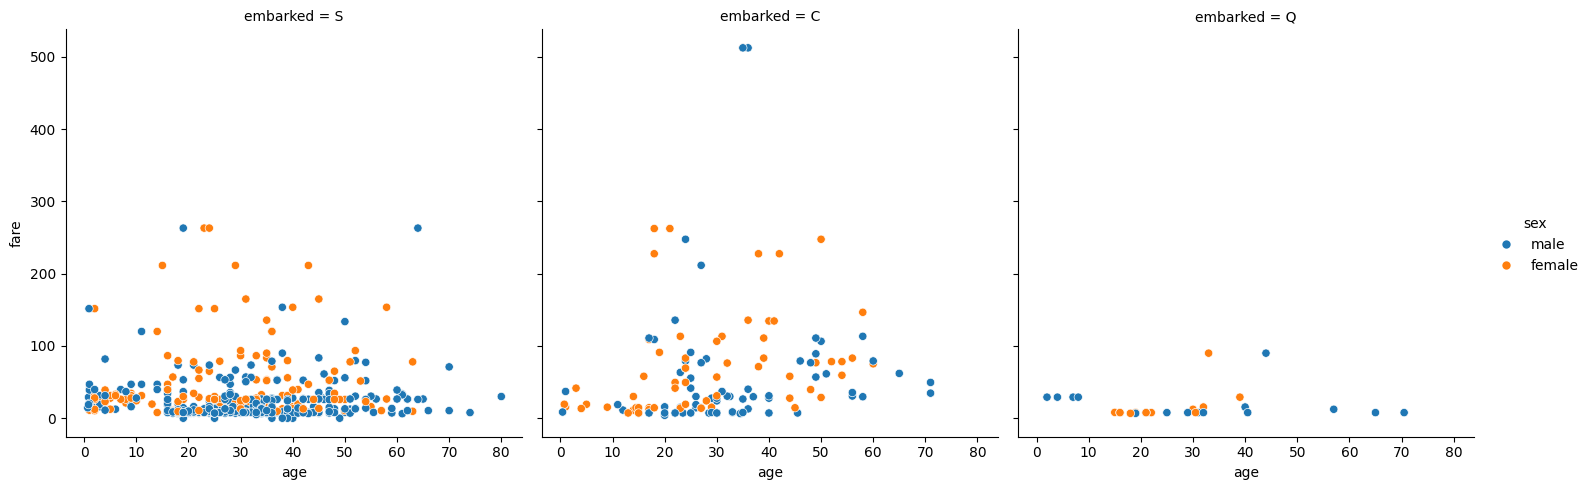

In [33]:
sns.relplot(data=titanic,
            x="age",
            y="fare",
            hue="sex",
            col="embarked");

### 3.2.&nbsp; Specific to scatter

#### 3.2.1.&nbsp; Changing the shape of the marker

##### `style`

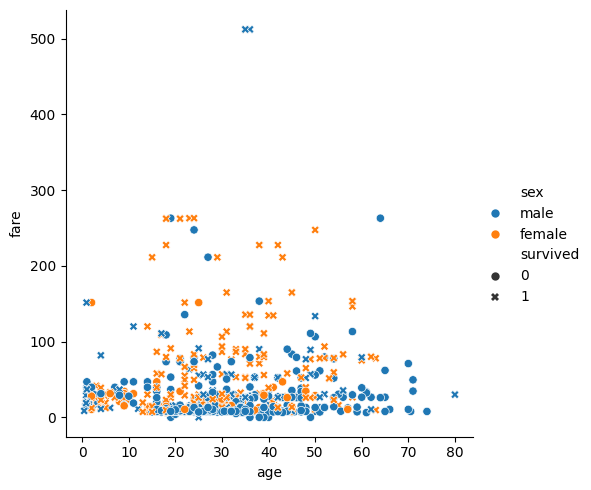

In [34]:
sns.relplot(data=titanic,
            x="age",
            y="fare",
            hue="sex",
            style="survived");

# Loading Eniac

In [35]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Challenges:
Let's start combining some of the skills we've learnt with `.groupby()`, `datetime`, and `seaborn` (no pandas plotting this time, please use seaborn).

Sometimes you may have to make a smaller DataFrame to help Seaborn. Here's a quick example of one way to plot the top 10 brands based on the amount of products sold.

In [36]:
ol_df = orderlines_qu.copy()

In [37]:
# alternative personal way: I don't define the new column, I specify the equivalence directly in
#                           the merge command_
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                left_on=ol_df["sku"].str[:3],
                                right_on="short")
ol_with_brands_df.info()
ol_with_brands_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   short             53231 non-null  object 
 8   long              53195 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.7+ MB


,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [38]:
ol_df["short"] = ol_df["sku"].str[:3]

In [39]:
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                left_on="short",
                                right_on="short")
ol_with_brands_df.info()
ol_with_brands_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   short             53231 non-null  object 
 8   long              53195 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.7+ MB


,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [40]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404
9,Belkin,2279
67,LaCie,2130
19,Crucial,2070
128,Satechi,1824
160,Wacom,1816
106,Pack,1710
91,NewerTech,1648


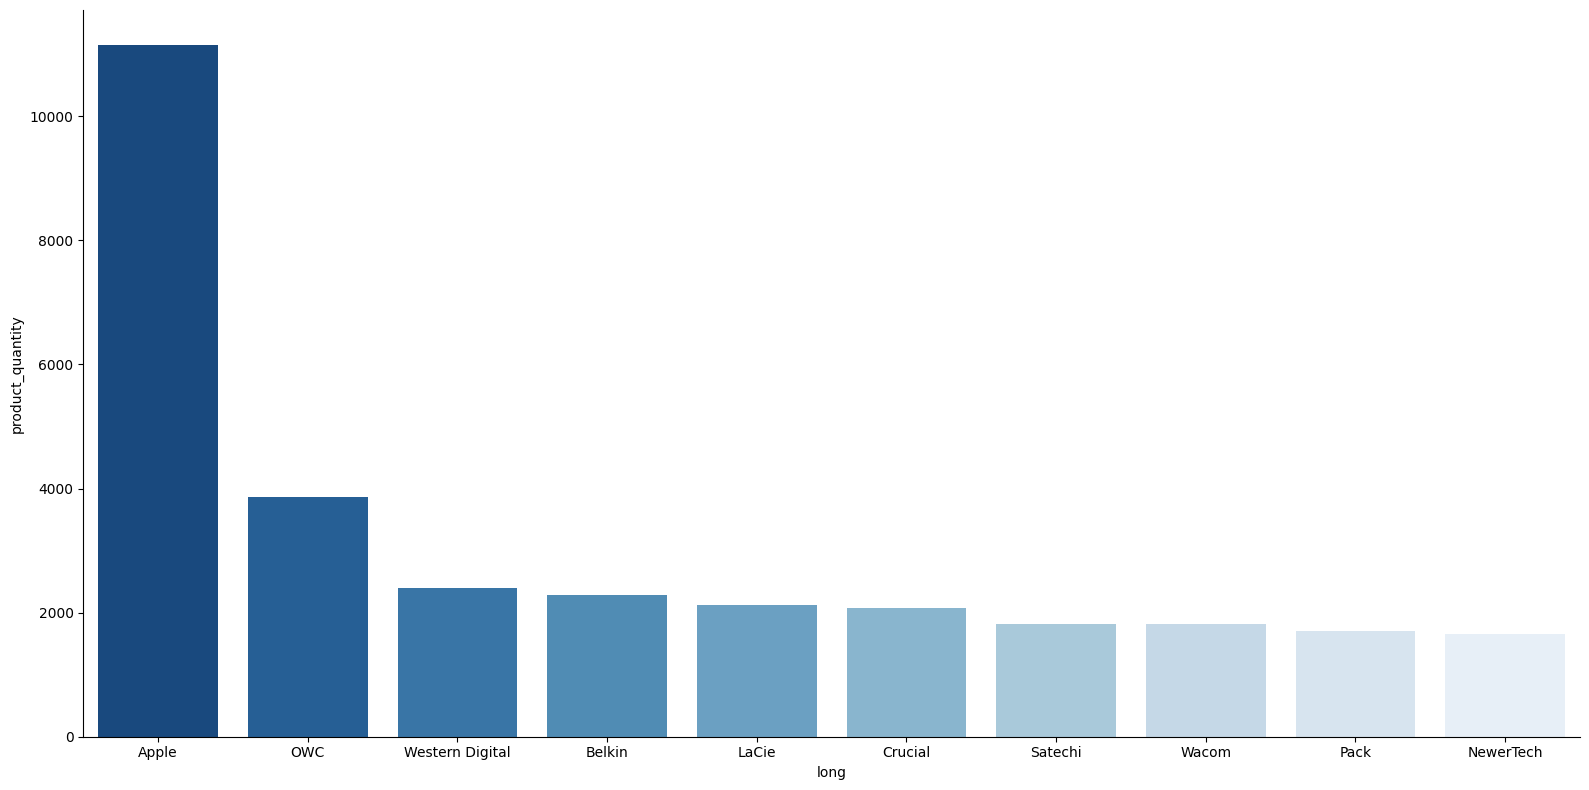

In [41]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

## Challenge 2:
Create a scatter plot to explore the relationship between the recommended price for a product (`products.price`) and the price that products actually sold for (`orderlines.unit_price`)

**Hint:** You don't need to groupby here. Just bring a couple of tables together and then use seaborn.

In [42]:
# your code here
ol_prod_df = products_cl.merge(orderlines_qu.groupby('sku')['unit_price'].mean(),
                                 how="left",
                                 on="sku"
                                 )
#ol_prod_df['date'] = pd.to_datetime(ol_prod_df['date'])
ol_prod_df.info()
ol_prod_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sku         9992 non-null   object 
 1   name        9992 non-null   object 
 2   desc        9992 non-null   object 
 3   price       9992 non-null   float64
 4   in_stock    9992 non-null   int64  
 5   type        9946 non-null   object 
 6   unit_price  5098 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 546.6+ KB


,sku,name,desc,price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,46.342564
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,56.342078
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,57.206429


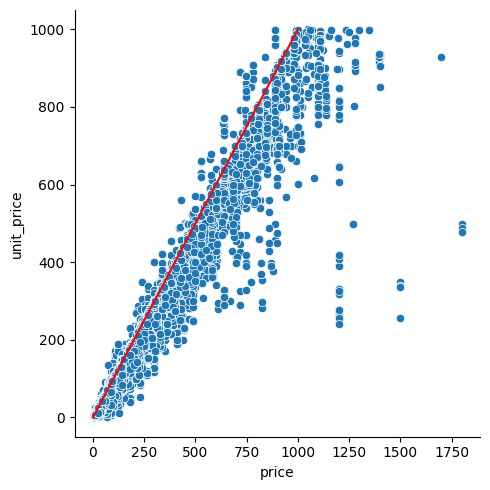

In [43]:
# Andre:

orderlines_new = orderlines_qu.copy()
orderlines_new = orderlines_new.merge(products_cl[['sku','price']], how='left', on='sku')
orderlines_new

sns.relplot(data=orderlines_new,
            x="price",
            y="unit_price" 
            );

# add from Philip:
from matplotlib import pyplot as plt
plt.plot([0,1000],[0,1000], color='r');

## Vasil

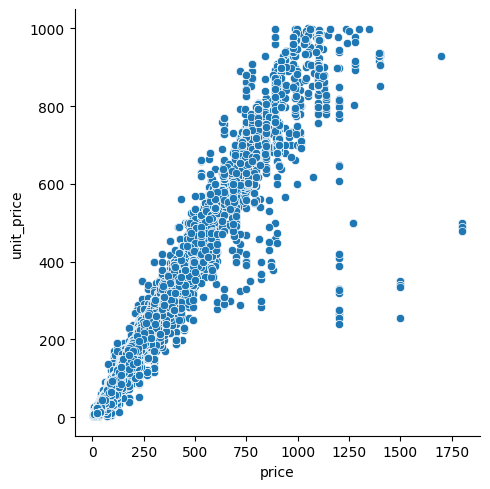

In [44]:
# Vasil

orderlines_new = orderlines_qu.copy()
orderlines_new = orderlines_new.merge(products_cl[['sku','price']], how='left', on='sku')
orderlines_new

sns.relplot(data=orderlines_new,
            x="price",
            y="unit_price"
            );

In [45]:
# Alternative

ol_df = orderlines_qu.copy()

ol_with_products_df = ol_df.merge(products_cl,
                                  how="left",
                                  on="sku")

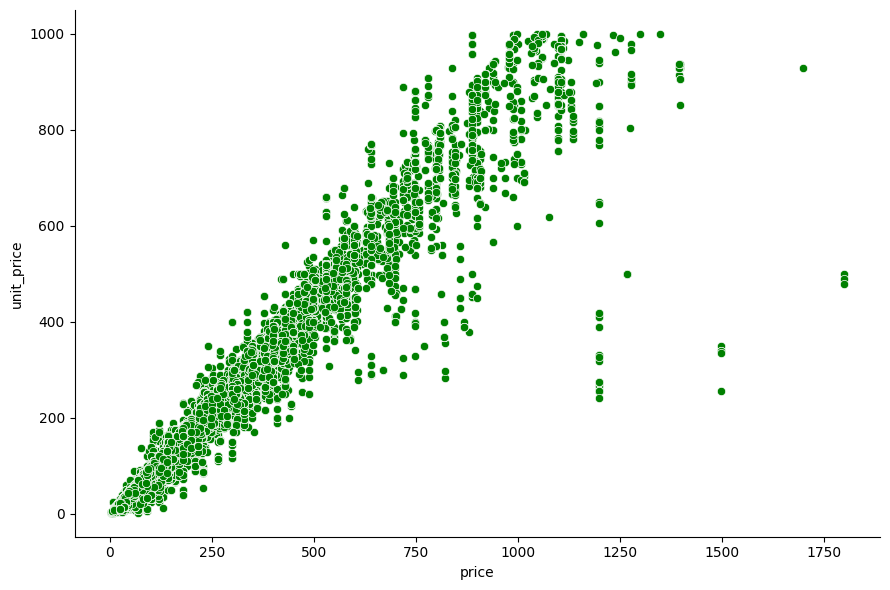

In [46]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           height=6,
           aspect=1.5,
           color="g");

In [47]:
ol_with_products_df["higher_same_lower"] = "same price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] > ol_with_products_df["price"], "higher_same_lower"] = "higher price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] < ol_with_products_df["price"], "higher_same_lower"] = "lower price"

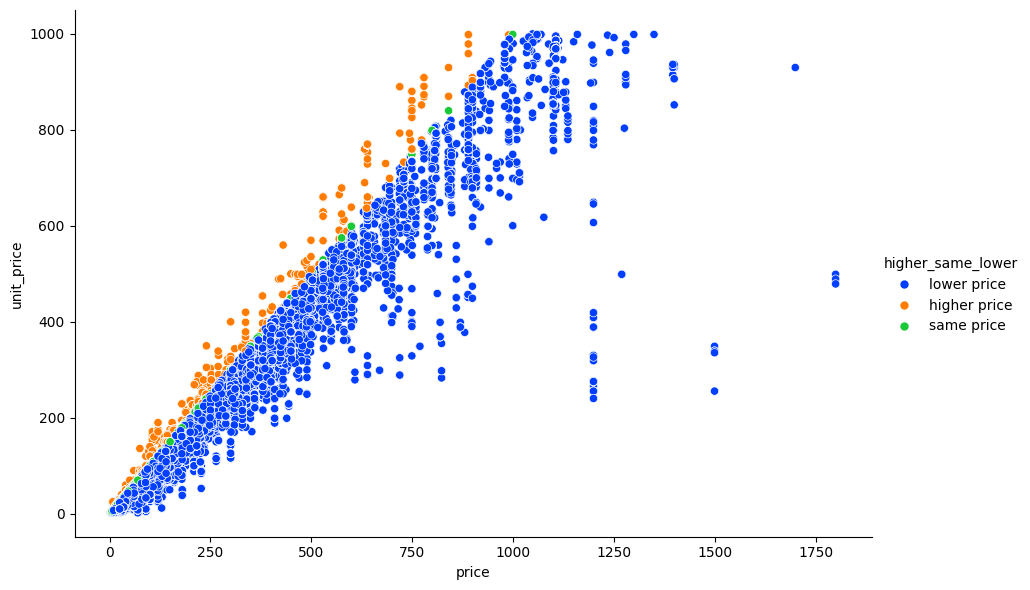

In [48]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           hue="higher_same_lower",
           #style="in_stock",
           height=6,
           aspect=1.5,
           palette="bright");

## Challenge 3:
Let's investigate when customers like to spend more money. Display the average daily price of an order on a line plot.

**Hint:** first work on finding the daily average of `total_paid`, make sure you have this saved as a DataFrame, then work on your plot using this DataFrame.

In [49]:
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])

In [50]:
# your code here
daily_avg_total_paid = orders_qu.groupby(orders_qu.created_date.dt.dayofweek)[['total_paid']].mean()
daily_avg_total_paid

,total_paid
created_date,
0,193.758555
1,196.204607
2,194.891267
3,214.736626
4,188.739876
5,185.179943
6,184.300017


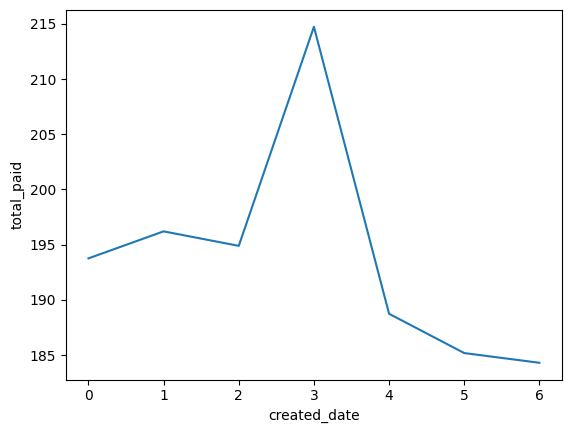

In [51]:
sns.lineplot(data=daily_avg_total_paid,
            x="created_date",
            y="total_paid"
             );

<class 'pandas.core.frame.DataFrame'>


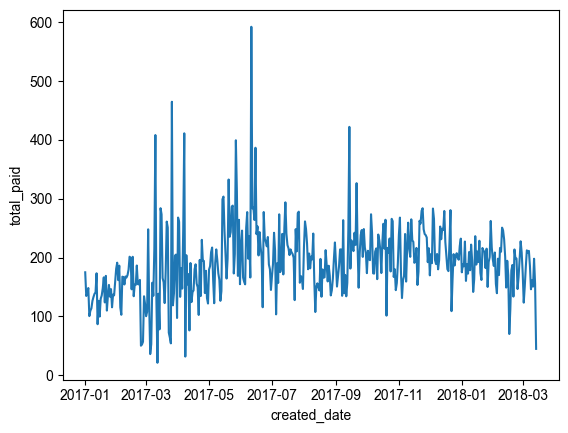

In [52]:
# Andre:
orders_new = orders_qu.copy()
orders_new['created_date'] = pd.to_datetime(orders_new['created_date'])


plot_data = (orders_new
      .resample('D', on='created_date')
      .agg({'total_paid':'mean'})

)

print(type(plot_data))

sns.lineplot(data=plot_data,
              x='created_date',
             y='total_paid');
sns.set(rc={'figure.figsize':(15,15)})

## Challenge 4:
Make a bar plot for the top 10 products sold in January 2017 & the top 10 products sold in January 2018.

In [53]:
orderlines_qu.date = pd.to_datetime(orderlines_qu.date)
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.8+ MB


In [54]:
# your code here
top_10_prod_2017_1 = (
                    orderlines_qu.loc[((orderlines_qu.date.dt.month==1) & (orderlines_qu.date.dt.year==2017))]
                         .groupby('sku', as_index=False)['product_quantity']
                         .sum()
                         .nlargest(10, 'product_quantity')
                    )

top_10_prod_2018_1 = (
                    orderlines_qu.loc[((orderlines_qu.date.dt.month==1) & (orderlines_qu.date.dt.year==2018))]
                         .groupby('sku', as_index=False)['product_quantity']
                         .sum()
                         .nlargest(10, 'product_quantity')
                    )

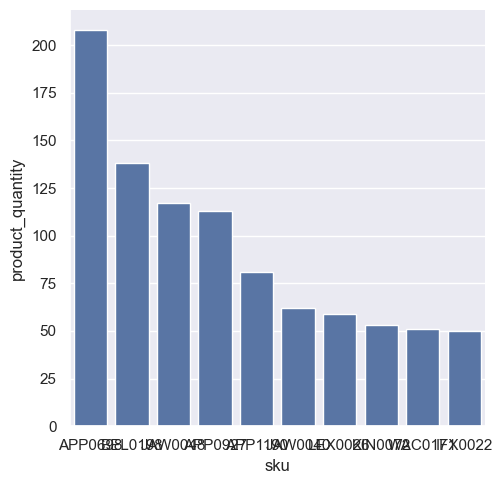

In [55]:
sns.catplot(kind="bar",
            data=top_10_prod_2017_1,
            x="sku",
            y="product_quantity",
           );

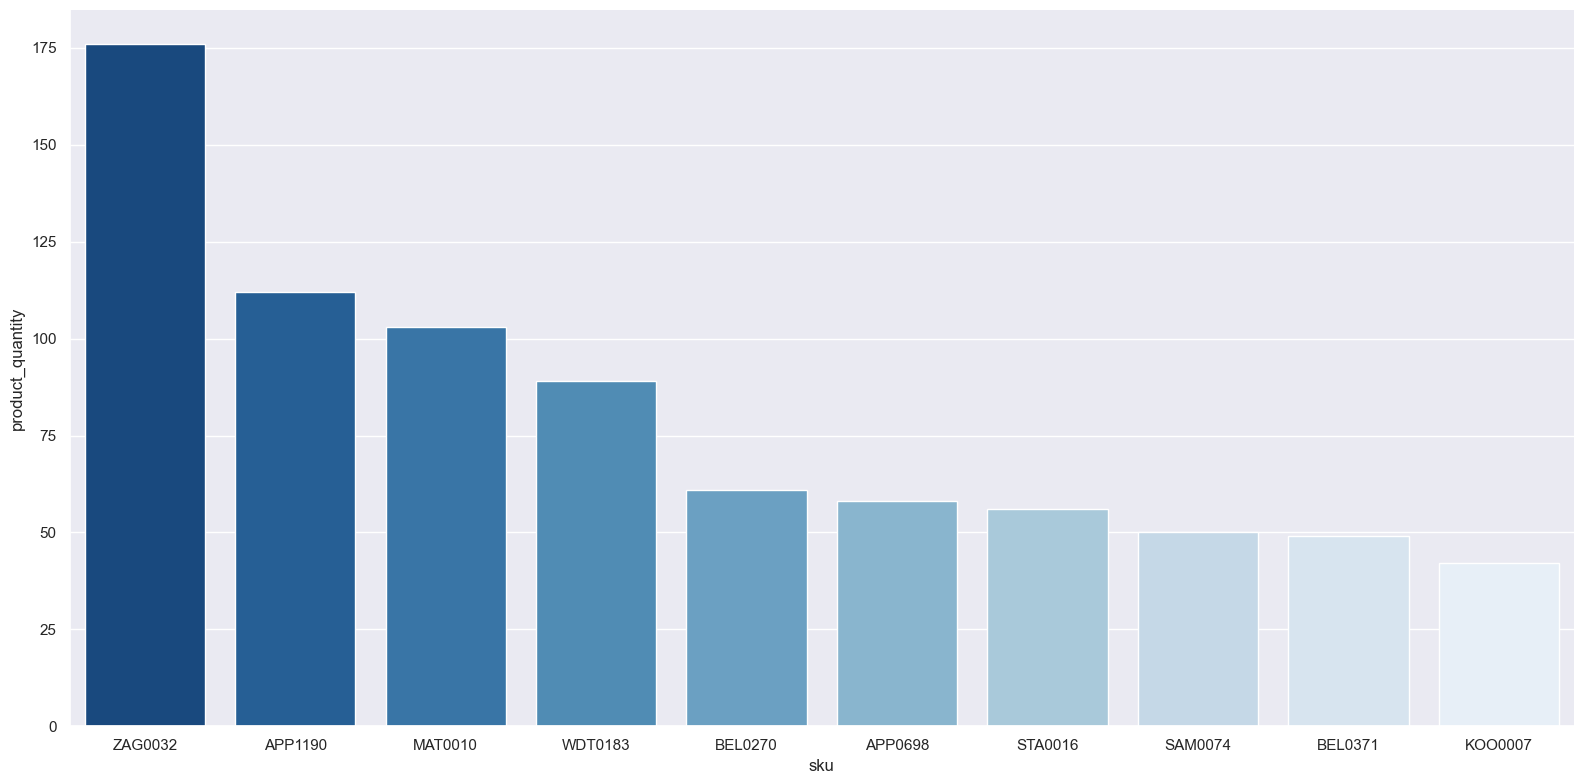

In [56]:
sns.catplot(kind="bar",
            data=top_10_prod_2018_1,
            x="sku",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

## Vasil:

In [57]:
january_df = orderlines_qu.loc[(orderlines_qu.date.dt.month==1)]
january_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
47864,1593947,503440,0,1,ZAG0034,8.99,2018-01-31 23:55:51
47865,1593948,503441,0,1,WDT0318,249.99,2018-01-31 23:55:54
47866,1593956,503440,0,1,JMO0066,9.99,2018-01-31 23:57:00
47867,1593958,503440,0,1,MOX0019,3.71,2018-01-31 23:57:20


In [58]:
january_df['year'] = january_df.date.dt.year
january_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,year
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,2017
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,2017
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,2017
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,2017
...,...,...,...,...,...,...,...,...
47864,1593947,503440,0,1,ZAG0034,8.99,2018-01-31 23:55:51,2018
47865,1593948,503441,0,1,WDT0318,249.99,2018-01-31 23:55:54,2018
47866,1593956,503440,0,1,JMO0066,9.99,2018-01-31 23:57:00,2018
47867,1593958,503440,0,1,MOX0019,3.71,2018-01-31 23:57:20,2018


In [59]:
top_10_prod_january = (
                    january_df
                         .groupby(['year', 'sku'], as_index=False)['product_quantity']
                         .sum()
                         .sort_values(by=['year', 'product_quantity'], ascending=False)
                         .groupby('year').head(10) # this line is to get only the top 10 for each year
                    )
top_10_prod_january

,year,sku,product_quantity
3536,2018,ZAG0032,176
1858,2018,APP1190,112
2612,2018,MAT0010,103
3464,2018,WDT0183,89
2075,2018,BEL0270,61
1821,2018,APP0698,58
3254,2018,STA0016,56
3079,2018,SAM0074,50
2110,2018,BEL0371,49
2480,2018,KOO0007,42


In [60]:
# merge top_10_prod_january with products_cl:
top_10_names_january = top_10_prod_january.merge(products_cl,
                                                 how='left',
                                                 on='sku'
                                                )
top_10_names_january.head()

,year,sku,product_quantity,name,desc,price,in_stock,type
0,2018,ZAG0032,176,Rugged Messenger Zagg iPad Keyboard Folio (201...,Keyboard folio and adjustable position for 97-...,99.99,1,12575403
1,2018,APP1190,112,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231
2,2018,MAT0010,103,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,69.99,1,13855401
3,2018,WDT0183,89,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397
4,2018,BEL0270,61,PowerHouse Base Load Belkin Apple Watch and iP...,Lightning charger and connection support and m...,99.99,1,13615399


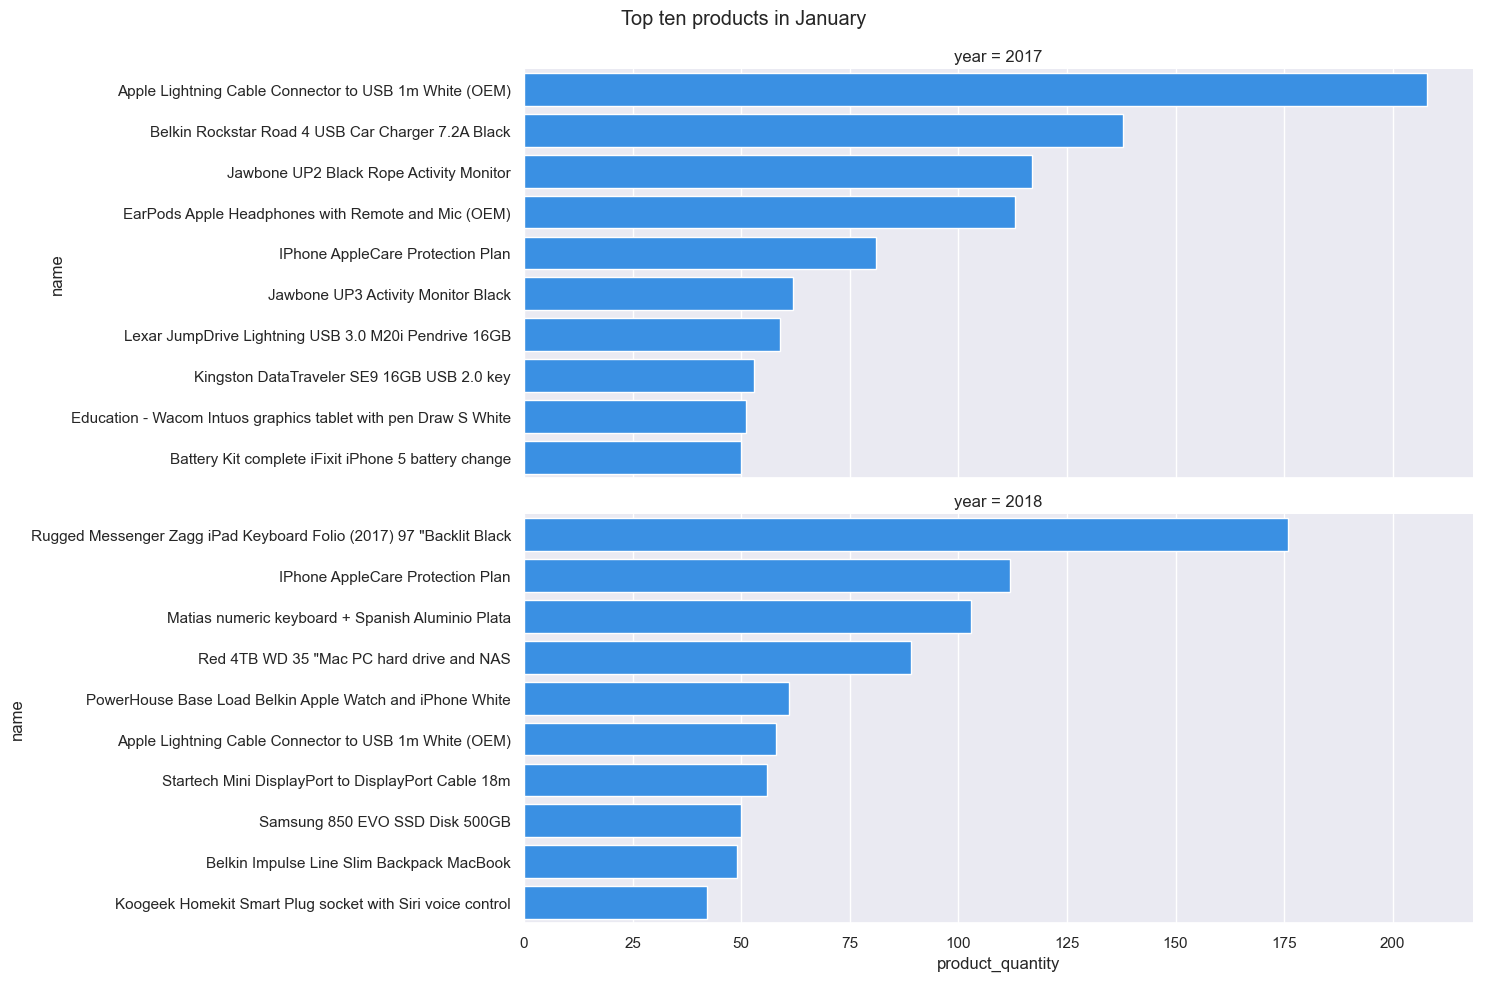

In [61]:
sns.set(font_scale=1)

(
sns.catplot(kind="bar",
            data=top_10_names_january,
            x="product_quantity",
            y="name",
            row="year",
            color="dodgerblue",
            aspect=3,
            sharey=False) # this line is to not share the y axis
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
    .figure.suptitle("Top ten products in January")
    .figure.subplots_adjust(top=.92)
);

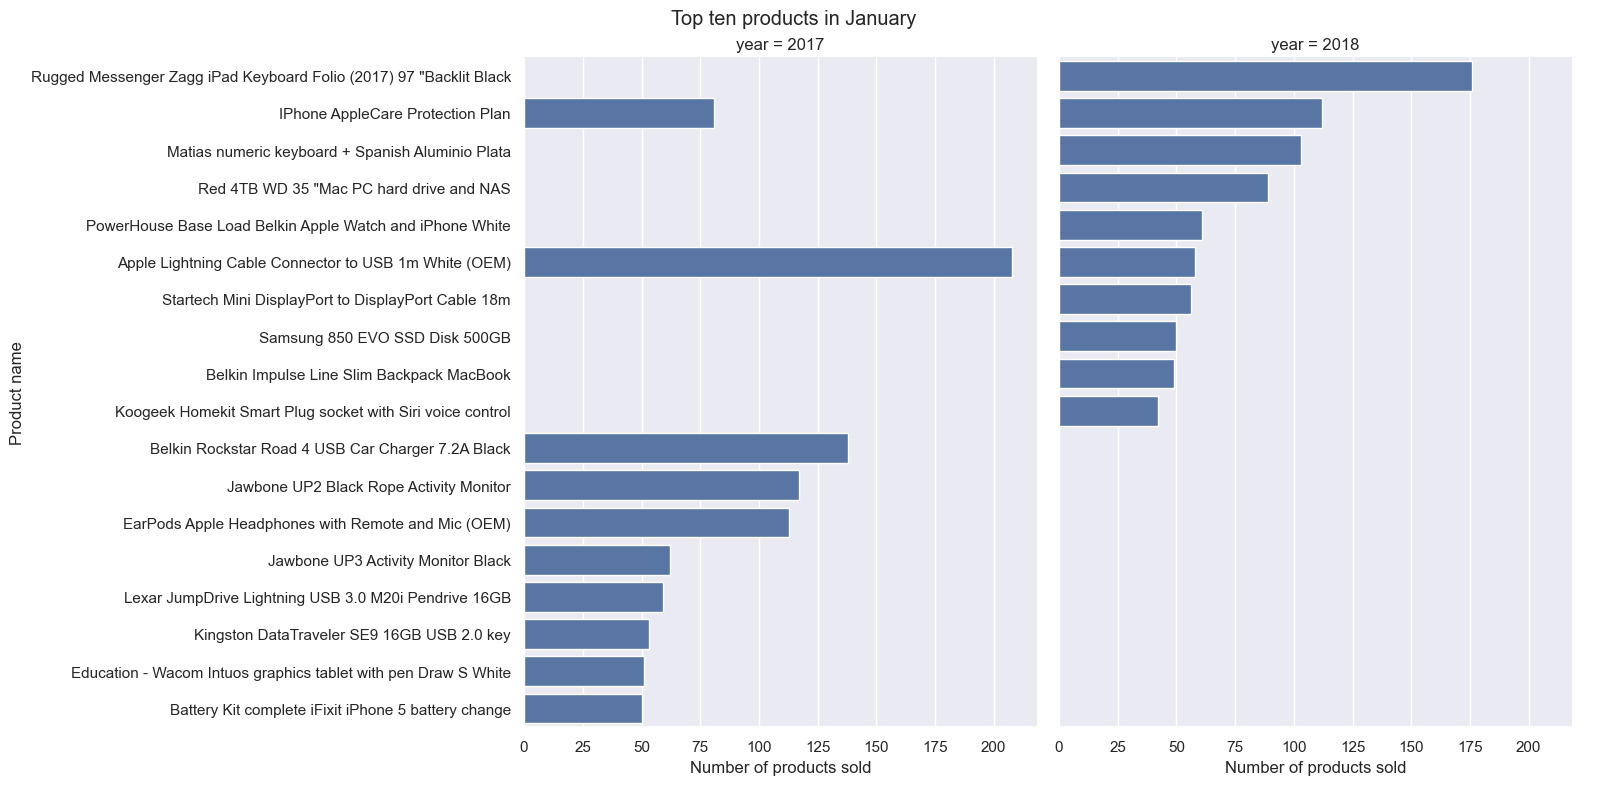

In [62]:
(
sns.catplot(data=top_10_names_january,
                 x="product_quantity",
                 y="name",
                 col="year",
                 kind="bar",
                 height=8)
    .set_axis_labels("Number of products sold",
                     "Product name")
    .figure.suptitle("Top ten products in January")
    .figure.subplots_adjust(top=.92)
)

## Bonus challenge:
This challenge is an extra. We will not go through the solution in class. It's here for those of you who finish early or are inquisitive.

Find the top 10 brands that have generated the most revenue in the snapshot we have. Show the daily revenue generated by each of these brands on a line plot, use a seperate line for each brand.

In [63]:
ol_with_brands_df.date = pd.to_datetime(ol_with_brands_df.date)
ol_with_brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   short             53231 non-null  object        
 8   long              53195 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 3.7+ MB


In [64]:
# your code here
ol_with_brands_df['tot_unit_price'] = ol_with_brands_df.unit_price * ol_with_brands_df.product_quantity
ol_with_brands_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long,tot_unit_price
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple,72.19
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,CRU,Crucial,60.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,PEB,Pebble,142.49


In [65]:
top_10_brands_revenue = ol_with_brands_df.groupby('long', as_index=False)[['tot_unit_price']].sum().nlargest(10, 'tot_unit_price')
top_10_brands_revenue.long
list_top_10_brands = list(top_10_brands_revenue.long)
list_top_10_brands

['Apple',
 'Pack',
 'OWC',
 'LaCie',
 'Western Digital',
 'LG',
 'Wacom',
 'Crucial',
 'Dell',
 'Synology']

In [66]:
top_10_brands_daily_revenue = ol_with_brands_df.groupby(['long', ol_with_brands_df.date.dt.dayofweek])[['tot_unit_price']].sum()#.nlargest(10, 'tot_unit_price')
top_10_brands_daily_revenue

tot_unit_price
long      date                
8Mobility 0             128.64
          1              83.96
          2              63.97
          3             161.78
          4             182.88
...                        ...
iOttie    2             517.58
          3             745.12
          4             591.63
          5             444.69
          6             648.33

[1046 rows x 1 columns]

In [67]:
top_10_brands_daily_revenue = top_10_brands_daily_revenue.loc[list_top_10_brands, ['tot_unit_price']]
top_10_brands_daily_revenue.reset_index()

,long,date,tot_unit_price
0,Apple,0,486454.02
1,Apple,1,404769.71
2,Apple,2,401092.56
3,Apple,3,406500.72
4,Apple,4,425656.01
...,...,...,...
65,Synology,2,23024.18
66,Synology,3,27943.71
67,Synology,4,27605.01
68,Synology,5,11180.14


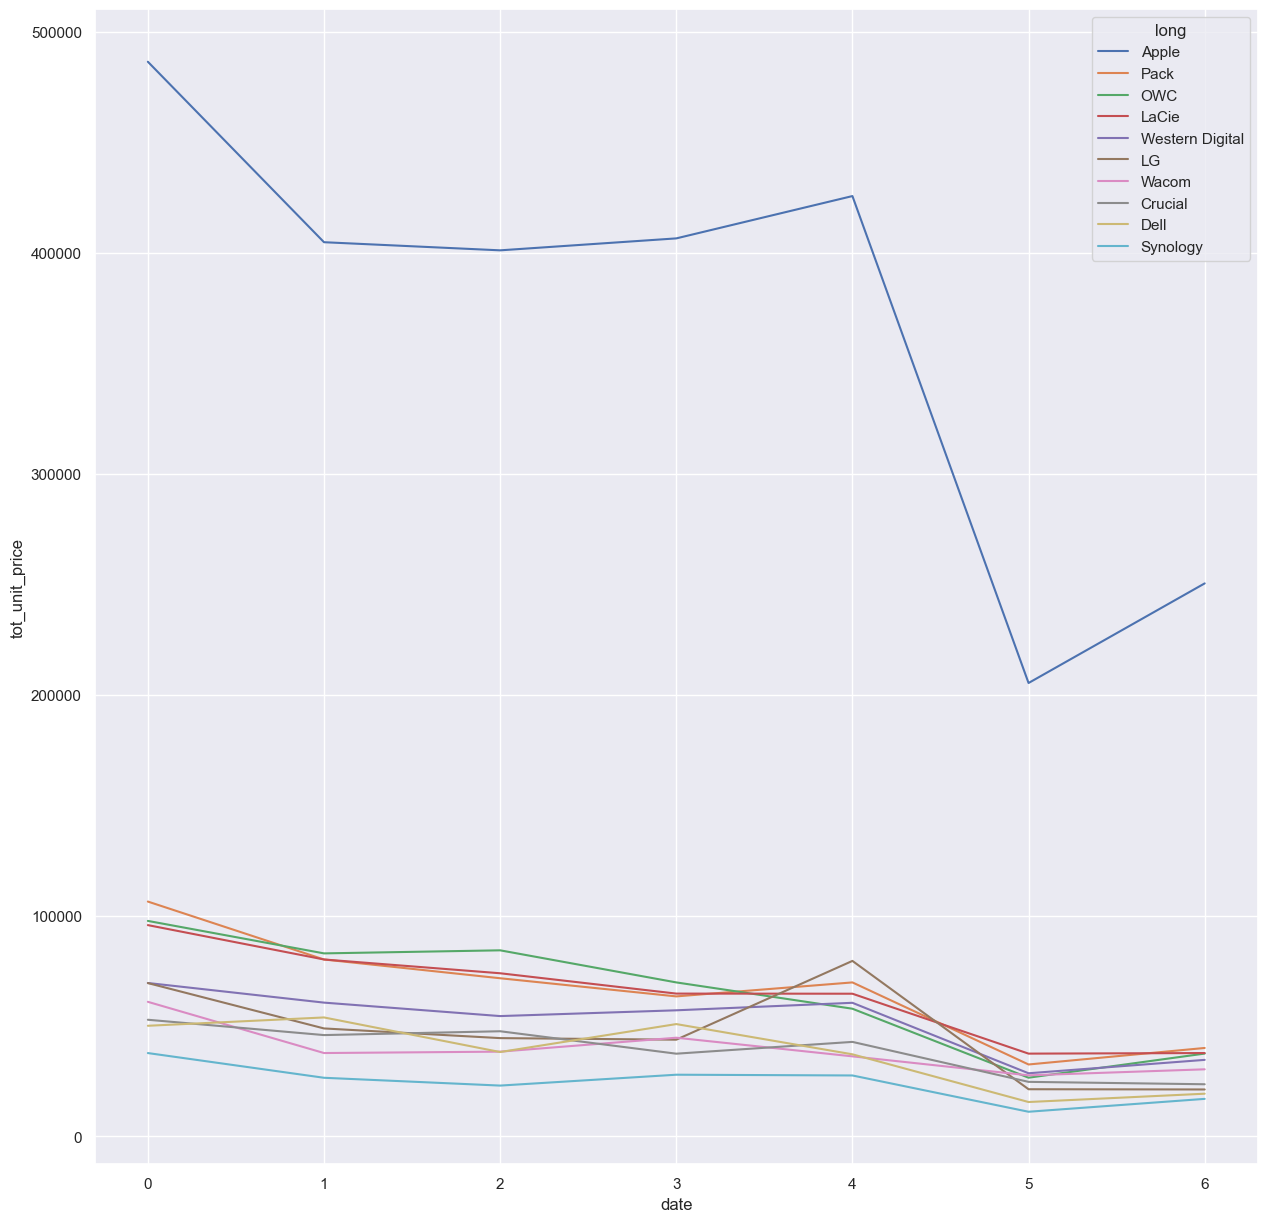

In [68]:
sns.lineplot(data=top_10_brands_daily_revenue.reset_index(),
            x="date",
            y='tot_unit_price',
            hue='long'
             );

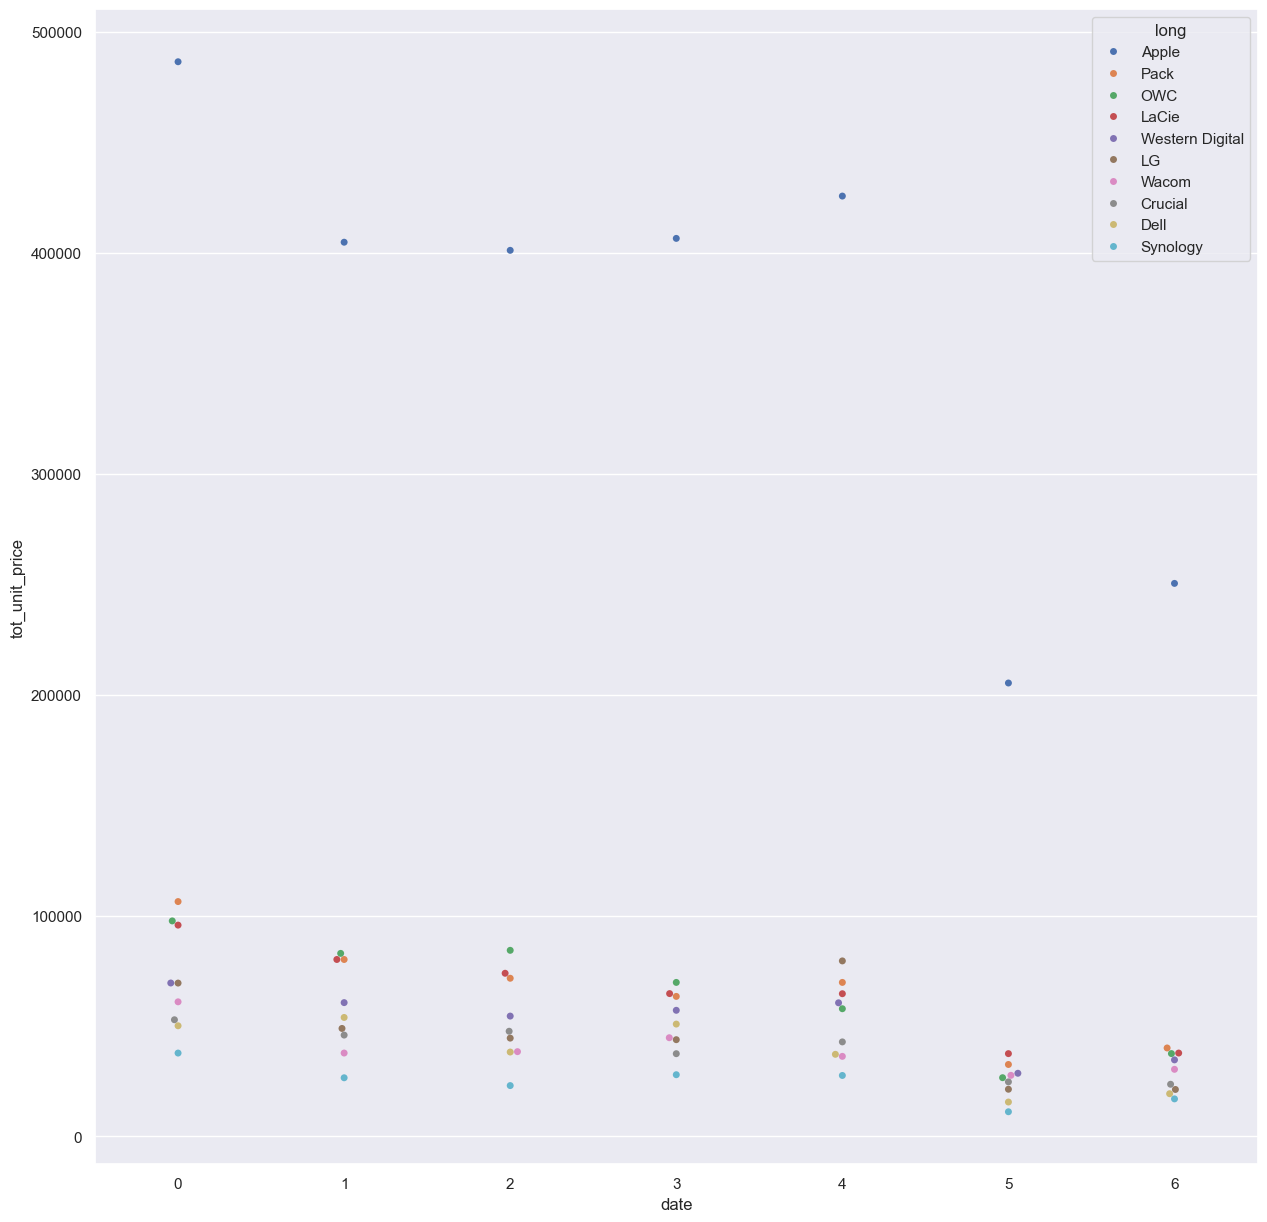

In [69]:
sns.swarmplot(data=top_10_brands_daily_revenue,
                x='date',
                y='tot_unit_price',
                hue='long'
               );

## Vasil:

In [70]:
# Alternative

ol_df = orderlines_qu.copy()
ol_df["short"] = ol_df["sku"].str[:3]
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                on="short")
ol_with_brands_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,CRU,Crucial
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,PEB,Pebble
...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,APP,Apple
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,APP,Apple
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,APP,Apple
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,APP,Apple


In [71]:
top_10_brands_list = (
                      list(
                          ol_with_brands_df
                          .groupby("long", as_index=False)
                          ["unit_price"]
                          .sum()
                          .nlargest(10, "unit_price")
                          ["long"]
                          )
                      )

top_10_brands_list

['Apple',
 'Pack',
 'LaCie',
 'OWC',
 'LG',
 'Western Digital',
 'Wacom',
 'Crucial',
 'Dell',
 'Synology']

In [72]:
ol_with_brands_df["date"] = pd.to_datetime(ol_with_brands_df["date"])

In [73]:
ol_with_brands_df["date"] = ol_with_brands_df["date"].dt.date

In [74]:
ol_with_brands_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01,APP,Apple
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01,CRU,Crucial
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01,PEB,Pebble
...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14,APP,Apple
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14,APP,Apple
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14,APP,Apple
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14,APP,Apple


In [75]:
daily_totals_df = (
                  ol_with_brands_df
                  .loc[ol_with_brands_df["long"].isin(top_10_brands_list), :]
                  .groupby(["date", "long"], as_index=False)
                  ["unit_price"]
                  .sum()
                  )
daily_totals_df

,date,long,unit_price
0,2017-01-01,Apple,2735.72
1,2017-01-01,Crucial,141.64
2,2017-01-01,LG,400.67
3,2017-01-01,LaCie,587.07
4,2017-01-01,OWC,741.91
...,...,...,...
3373,2018-03-13,Western Digital,471.98
3374,2018-03-14,Apple,1049.58
3375,2018-03-14,LaCie,108.23
3376,2018-03-14,OWC,222.97


There's no easy way to relabel the legend, so this is a shortcut. If we didn't perform this step, the legend would be titled `long` - not the most useful title!

In [76]:
daily_totals_df.rename(columns={"long": "Company"}, inplace=True)

In [94]:
daily_totals_df.date = pd.to_datetime(daily_totals_df.date)
daily_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3378 non-null   datetime64[ns]
 1   Company     3378 non-null   object        
 2   unit_price  3378 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 79.3+ KB


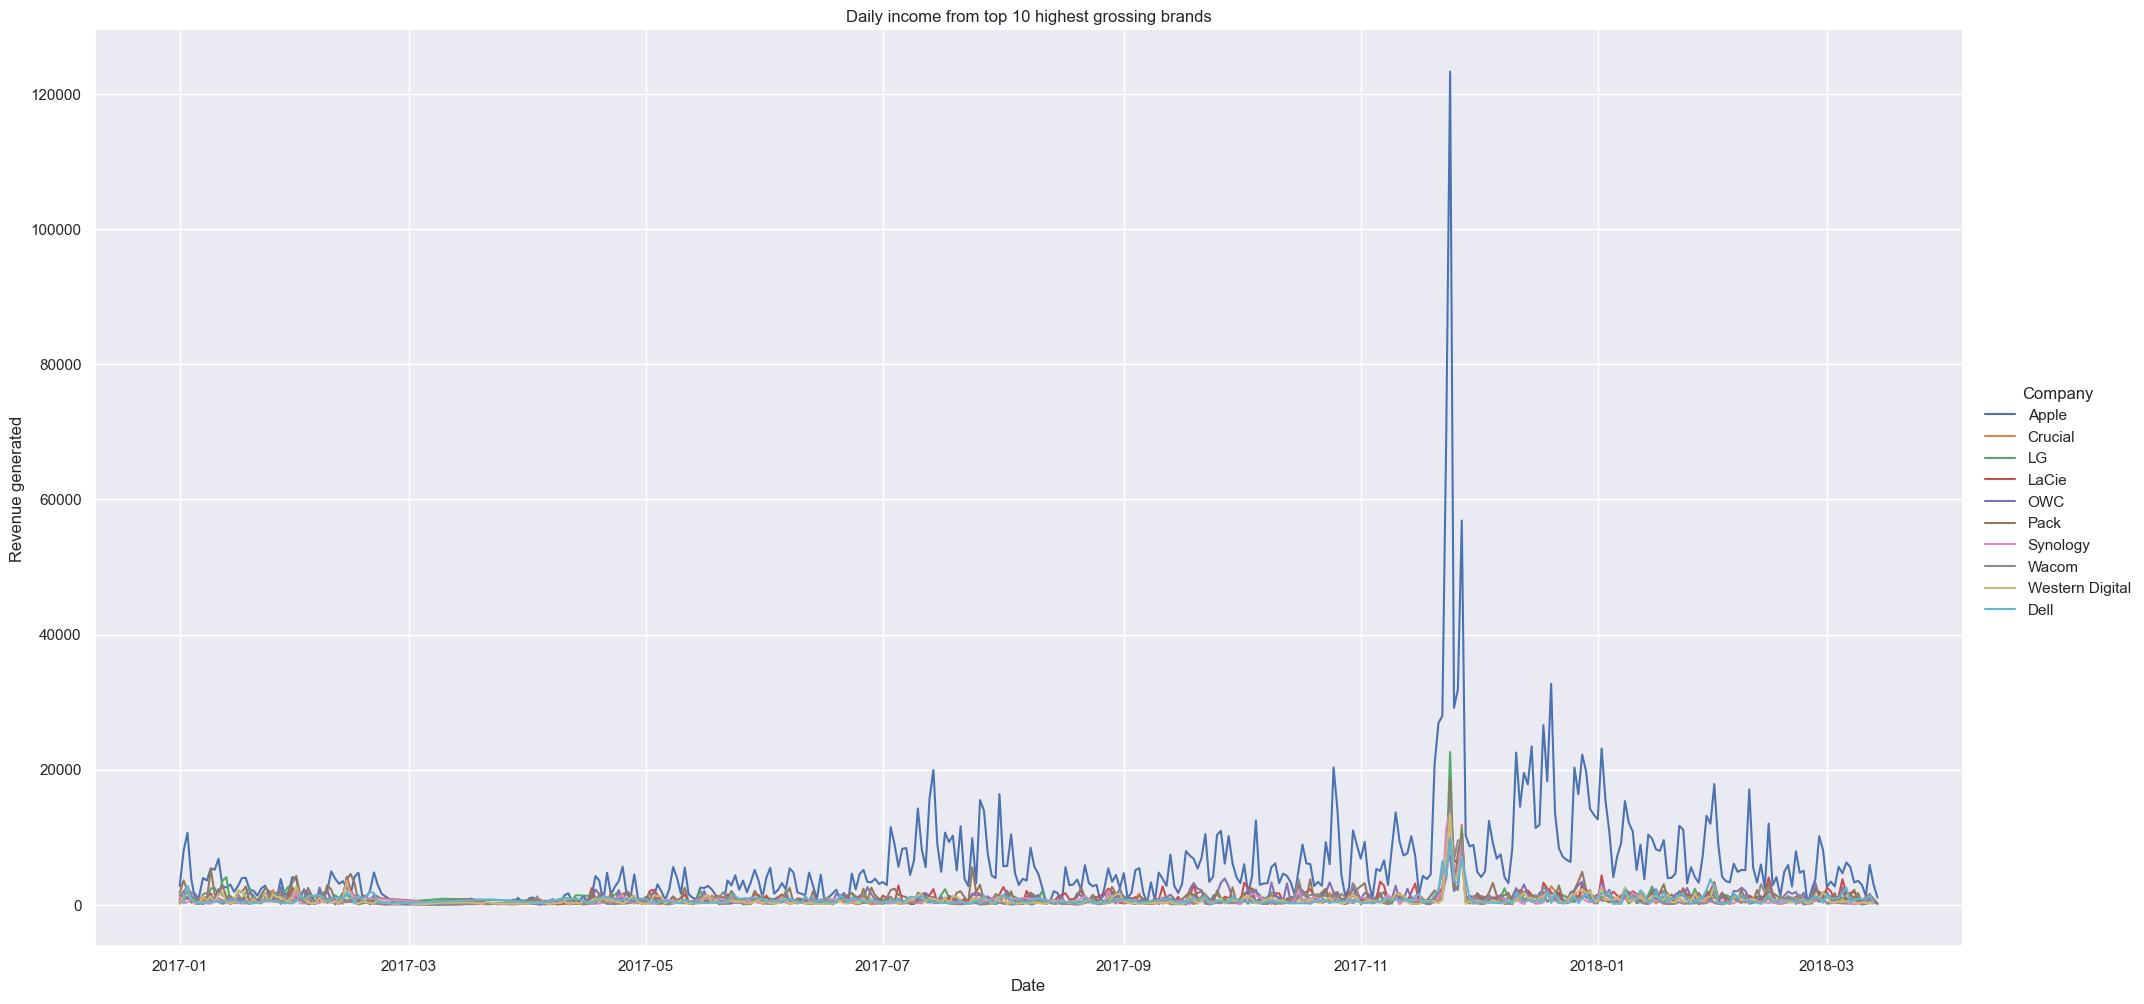

In [127]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = daily_totals_df,
            x="date",
            y="unit_price",
            hue="Company",
            kind="line",
            height= 10,
            aspect=2)
    .set_axis_labels("Date",
                     "Revenue generated")
    .set(title="Daily income from top 10 highest grossing brands")
);

This is another good example of a plot that can help with analysis, but is too complex for a presentation.

In [128]:
#daily_totals_df['season'] = ''
daily_totals_df.loc[(daily_totals_df['date']>='2017-12-24') & (daily_totals_df['date']<='2018-01-01'), 'season'] = 'Christmas'
daily_totals_df.loc[(daily_totals_df['date']>='2017-11-23') & (daily_totals_df['date']<='2017-11-25'), 'season'] = 'Black Friday'

In [129]:
daily_totals_df.season.value_counts()

season
nan             3262
Christmas         86
Black Friday      30
Name: count, dtype: int64

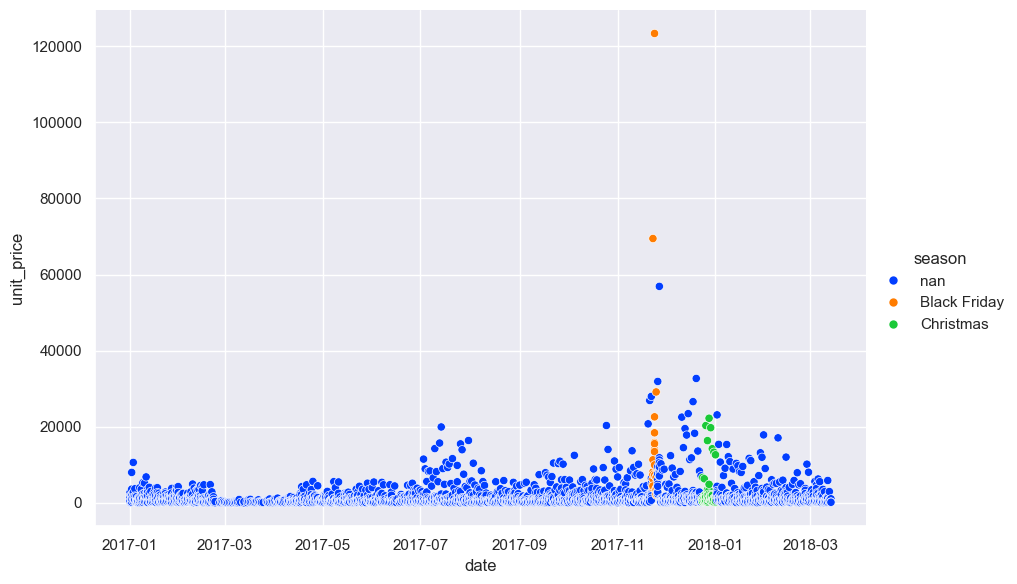

In [130]:
sns.relplot(data=daily_totals_df,
           x="date",
           y="unit_price",
           hue="season",
           #style="in_stock",
           height=6,
           aspect=1.5,
           palette="bright");

## Total revenue per day of all the sellingsol_with_brands_df

In [181]:
ol_with_brands_df.date = pd.to_datetime(ol_with_brands_df.date)
ol_with_brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   short             53231 non-null  object        
 8   long              53195 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 3.7+ MB


In [182]:
ol_with_brands_df.groupby('date')[['unit_price']].sum().reset_index().nlargest(10, 'unit_price')

,date,unit_price
327,2017-11-24,337505.98
330,2017-11-27,184582.82
326,2017-11-23,160905.98
329,2017-11-26,115128.68
328,2017-11-25,90870.08
366,2018-01-02,64188.84
361,2017-12-28,61939.08
325,2017-11-22,61930.34
353,2017-12-20,56633.30
351,2017-12-18,55313.75


In [205]:
day_income_all_sellers = ol_with_brands_df.groupby('date')[['unit_price']].sum().reset_index()
day_income_all_sellers.head()
day_income_all_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        438 non-null    datetime64[ns]
 1   unit_price  438 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


In [211]:
day_income_all_sellers['season'] = 'None'
day_income_all_sellers.loc[(day_income_all_sellers['date']>='2017-12-24') & (day_income_all_sellers['date']<='2018-01-01'), 'season'] = 'Christmas'
day_income_all_sellers.loc[(day_income_all_sellers['date']>='2017-11-23') & (day_income_all_sellers['date']<='2017-11-26'), 'season'] = 'Black Friday'
day_income_all_sellers.loc[(day_income_all_sellers['date']>='2018-01-02') & (day_income_all_sellers['date']<='2018-01-03'), 'season'] = 'New Year Sales'
day_income_all_sellers.loc[(day_income_all_sellers['date']=='2017-11-27'), 'season'] = 'Cyber Monday'
day_income_all_sellers.loc[(day_income_all_sellers['date']=='2017-02-14') | (day_income_all_sellers['date']=='2018-02-14'), 'season'] = "Valentine's Day"
day_income_all_sellers.head()

,date,unit_price,season
0,2017-01-01,14748.30,None
1,2017-01-02,36115.31,None
2,2017-01-03,36159.38,None
3,2017-01-04,16054.14,None
4,2017-01-05,10510.55,None


In [212]:
list(day_income_all_sellers.nlargest(10, 'unit_price').unit_price)

[337505.98,
 184582.82,
 160905.98,
 115128.68000000001,
 90870.08,
 64188.84,
 61939.08,
 61930.34,
 56633.3,
 55313.75]

In [213]:
for x in day_income_all_sellers.unit_price:
    if x in list(day_income_all_sellers.nlargest(10, 'unit_price').unit_price):
        print(x)

61930.34
160905.98
337505.98
90870.08
115128.68000000001
184582.82
55313.75
56633.3
61939.08
64188.84


In [214]:
day_income_all_sellers.nlargest(20, 'unit_price')

,date,unit_price,season
327,2017-11-24,337505.98,Black Friday
330,2017-11-27,184582.82,Cyber Monday
326,2017-11-23,160905.98,Black Friday
329,2017-11-26,115128.68,Black Friday
328,2017-11-25,90870.08,Black Friday
366,2018-01-02,64188.84,New Year Sales
361,2017-12-28,61939.08,Christmas
325,2017-11-22,61930.34,None
353,2017-12-20,56633.30,None
351,2017-12-18,55313.75,None


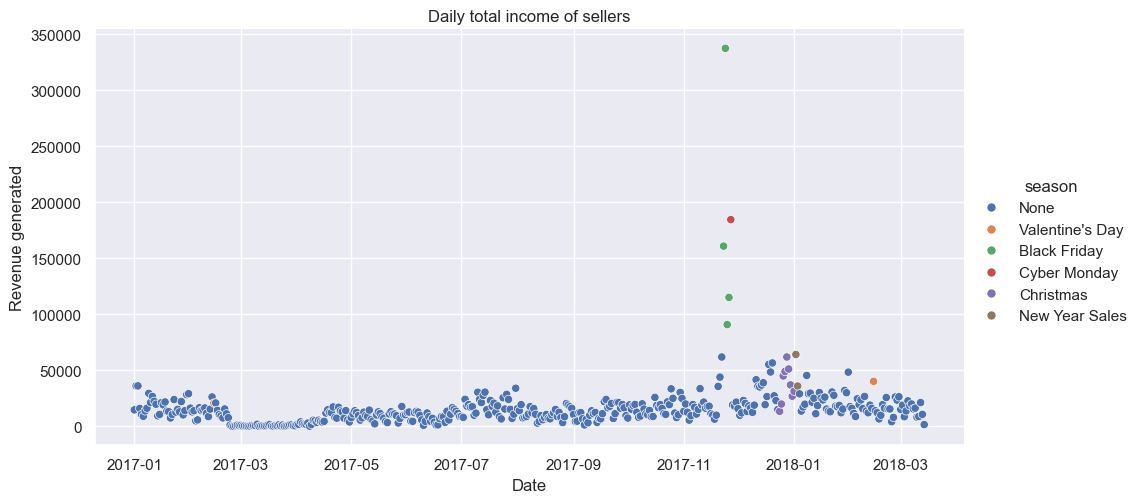

In [222]:
sns.set_theme(style="darkgrid")

custom_palette = {}
top10_sales = list(day_income_all_sellers.nlargest(10, 'unit_price').unit_price)
for x in day_income_all_sellers.unit_price:
    if x in top10_sales:
        custom_palette[x] = 'red'
    else:
        custom_palette[x] = 'g'

(
sns.relplot(data = day_income_all_sellers,
            x="date",
            y="unit_price",
            hue='season',
#            palette=["r"],  # Assign specific colors to specific days
#            kind="line",
#            height= 10,
            aspect=2
           )
    .set_axis_labels("Date",
                     "Revenue generated")
    .set(title="Daily total income of sellers")
);

In [231]:
for price in day_income_all_sellers.unit_price:
    if price in top10_sales:
        print(price)

36115.31
36159.38
29472.94
21317.51
26728.45
22392.58
21208.12
21821.14
23958.2
22137.600000000002
28270.8
29204.19
26272.48
20799.61
20924.53
24175.69
30487.3
24044.28
21275.08
27579.89
30588.16
23199.91
20671.43
25564.16
28616.93
24099.75
34058.37
20383.07
22004.56
24058.17
20512.56
21505.39
21253.78
20131.23
25886.52
21921.420000000002
33523.090000000004
25061.47
30350.2
24928.71
20007.6
33699.7
21713.42
35721.95
43978.69
61930.34
160905.98
337505.98
90870.08
115128.68000000001
184582.82
21661.32
23158.420000000002
20540.05
41650.13
35830.76
35180.06
36881.73
38946.47
26645.7
55313.75
48537.59
56633.3
27285.25
22958.29
44998.84
49005.63
61939.08
51240.88
37010.21
26927.8
31408.8
64188.84
36021.090000000004
29081.29
45484.72
29242.72
29707.25
21614.03
25091.75
30265.78
25250.53
23623.82
26119.1
30719.54
27758.16
32052.88
30054.67
48421.39
24644.68
23710.66
26742.69
40203.08
25776.06
26284.24
23460.52
26439.87
22784.49
19998.43
21246.81


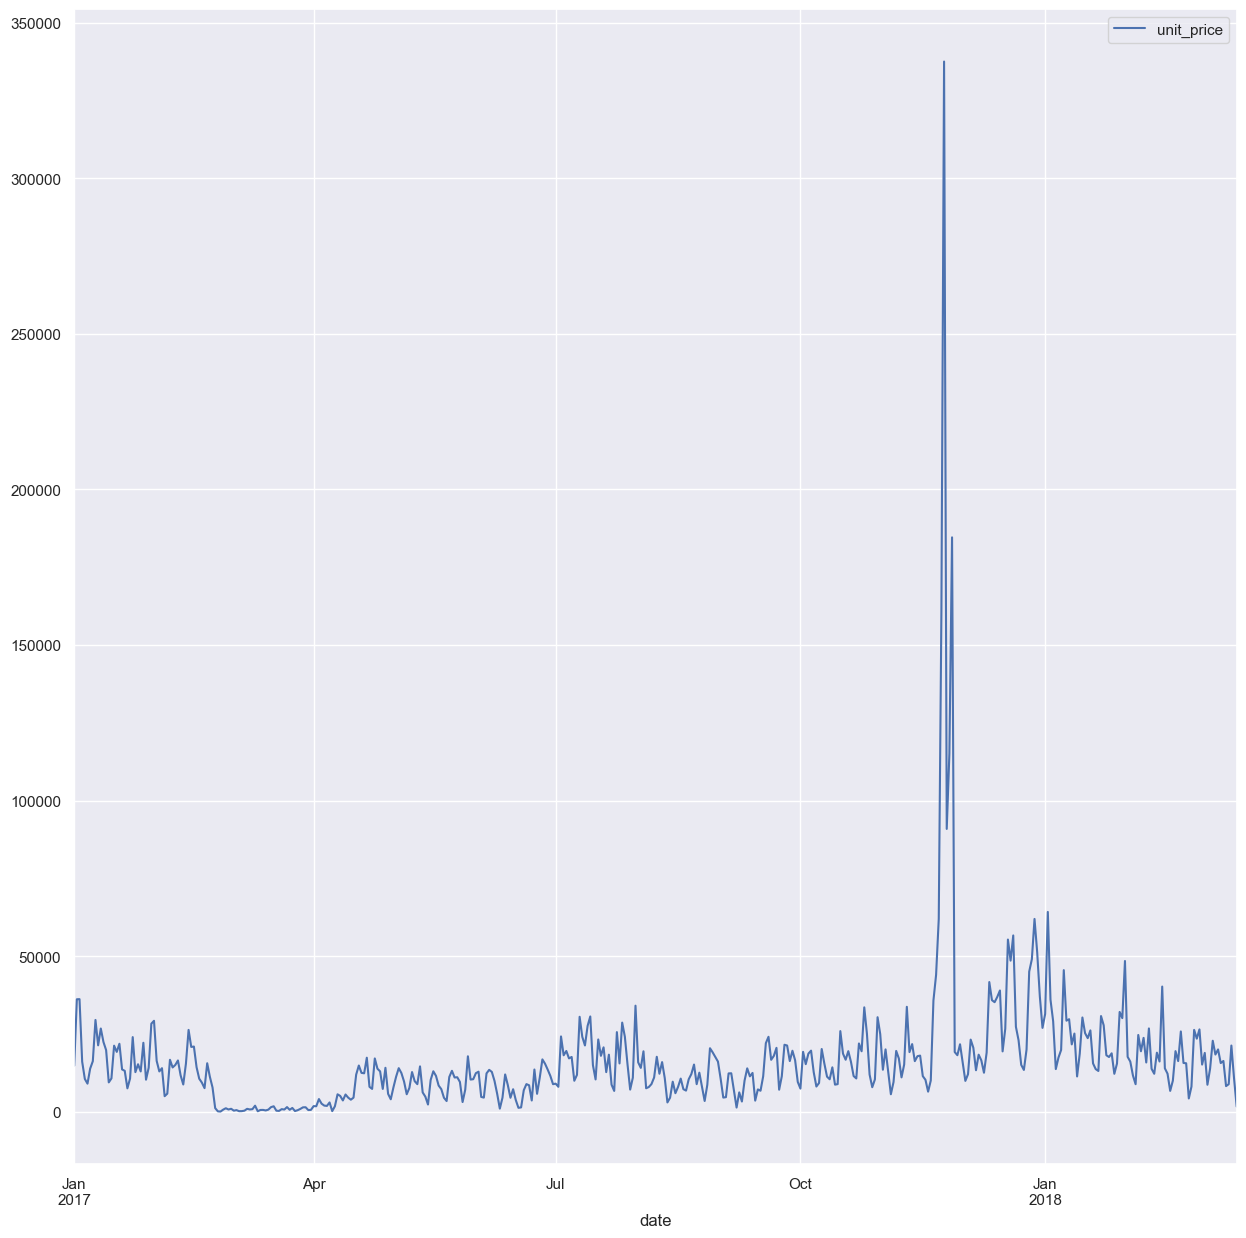

In [237]:

top10_sales = list(day_income_all_sellers.nlargest(10, 'unit_price').unit_price)

color_pattern = ['red'
                  if price in top10_sales
                  else 'b'
                      for price in day_income_all_sellers.unit_price ]

day_income_all_sellers.plot(x='date',
                            y='unit_price',
                            color=color_pattern
                           );